# Problem Statement

**Background & Context**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

**Objective**

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

**Data Dictionary:**

- CLIENTNUM: Client number. Unique identifier for the customer holding the account

- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"

- Customer_Age: Age in Years

- Gender: Gender of the account holder

- Dependent_count: Number of dependents

- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.

- Marital_Status: Marital Status of the account holder

- Income_Category: Annual Income Category of the account holder

- Card_Category: Type of Card

- Months_on_book: Period of relationship with the bank

- Total_Relationship_Count: Total no. of products held by the customer

- Months_Inactive_12_mon: No. of months inactive in the last 12 months

- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months

- Credit_Limit: Credit Limit on the Credit Card

- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance

- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)

- Total_Trans_Amt: Total Transaction Amount (Last 12 months)

- Total_Trans_Ct: Total Transaction Count (Last 12 months)

- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and 
the total transaction count in 1st quarter

- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter

- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

# Import Libraries

Import sklearn and python libraries needed to achieve our objectives

In [ ]:
!pip install shap

In [3]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Library to import Logistic Regression
from sklearn.linear_model import LogisticRegression 

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    roc_auc_score
)

# Libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Libraries for k fold and cross validation score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Libraries to creat pipelines
from sklearn.pipeline import Pipeline

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Remove limits for the number of displayed columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Library for SHAP
import shap

# Import libraries to create custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

# Load Data and Data Overview

In [4]:
# Importing library to mount my google drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Defining file path and saving data as a pandas dataframe
path = '/content/drive/MyDrive/Colab Notebooks/PGP in AI and ML/Project_5/BankChurners.csv'
data = pd.read_csv(path)
df = data.copy()

In [6]:
# Size of dataset
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 10127 rows and 21 columns


In [7]:
# reading the first 5 rows of our dataset
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [7]:
# Display last five rows
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

Based off this quick view, we can see that the dataset has mixed datatypes (int, floats and categorical)

In [8]:
# Display feature info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are 20 total columns
* 10,127 observations 
* There are 6 categorical features
* There are 14 numerical features
* Education and marital status have missing values

## Data Summary

In [8]:
# Look at data summary for numerical values
df.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

* Need to look into unique numbers for client number to see if it’s useful. Most likely won’t be useful and will be dropped
* Average customer age is 46 years old and 50% of the age ranges from 41 - 52 years
* Customers on average have 2 dependents
* Customers have been with the bank on average for almost 3 years (35 months). 
* Customers on average hold more than 3 products and 50% of the customer base hold 3-5 products
* Average months inactive is over 2
* In the last 12 months, the bank has had on average 2.5 contracts between the customer. Looking the quantile spread, I’m suspecting some outliers on the higher end of the data spread
* Credit limit seems to have some outliers on the higher and lower end but we’ll dig deeper into that later
* Total revolving balance for the average customer is ~1,163 dollars, but ranges from 0 to ~2,517 dollars
* Average amount left on the credit card to use was a little less than 7500 dollars
* Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter on average was 0.76 but majority of the data was within the .63 - .86 range. Also sense some outliers looking at the quantile spread 
* Ration of the number of total transactions in Q4 and total number in Q1 on average was 0.71
* Total transaction amount on average was a little over $4400
* Total number of transactions was on average 65 but half ranged between 45 to 81. Also sense some outliers here looking at the spread
* Average utilization rate is 27%


In [9]:
# Review summary of the non numerical features
df.describe(exclude='number').T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

* Attrition flag has two unique counts with the most frequent being 'Existing Customer'. This flag accounts for 84% of the entries
* Gender has two unique values with Females accounting for majority
* Education level has six different values and the most frequent is 'Graduate'
* Marital Status has three unique with married customers taking majority
* There are six different income categories and the most frequent are those who make less than 40k dollars
* Four different card categories exist with the most common being Blue

## Unique Values
This section will look at the unique values of the different features

In [10]:
# Lets see how many unique values the client number has
df['CLIENTNUM'].value_counts()

768805383    1
711784908    1
720133908    1
803197833    1
812222208    1
            ..
796903083    1
716014983    1
712521783    1
780045708    1
714337233    1
Name: CLIENTNUM, Length: 10127, dtype: int64

Unique value for each entry so dataset covers different clients. For this, the client number is not useful so we will drop the column from the dataset

In [8]:
# Dropping client number column
df.drop(['CLIENTNUM'], axis=1, inplace=True)

In [12]:
# Display first five rows to verify column was dropped
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [9]:
# Converting object datatypes to categorical to help with modeling, but also to make it easeir for me when exploring the dataset
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
  df[col] = df[col].astype('category')

In [14]:
# Look at dtype info to verify conversion was correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [10]:
# Creating list of numerical features
num_cols = df.select_dtypes(include=['number']).columns.tolist()

In [11]:
# Printing the unique values and counts for each categorical feature
for col in cat_cols: 
  print('Unique values and counts for {}:'.format(col))
  print(df[col].value_counts())
  print('_ _'*50)

Unique values and counts for Attrition_Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Unique values and counts for Gender:
F    5358
M    4769
Name: Gender, dtype: int64
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Unique values and counts for Education_Level:
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Unique values and counts for Marital_Status:
Married     4687
Single      3943
Divorced     748
Name: Marital_Status,

* Customer base of existing customer has an overwhelming majority
* Gender is split between male and female with females taking majority (~600 more counts)
* Top two Education labels are graduate and high school levels. Doctorate is the least common 
* Top two marital status is married and single. Third label is divorced but the other two have vast majority
* Income category for those making less than 40k dollars has a large majority from the second count (40k -60k). There also seems to be a label ‘abc’ in the data set so this will need to be replaced 
* Blue is the most common card category by a large amount and accounts for almost 90% of the entries


In [12]:
# Examining the entries for Income Category that has 'abc' as an entry
df[df['Income_Category']=='abc']

Attrition_Flag  Customer_Age Gender  Dependent_count  \
19     Existing Customer            45      F                2   
28     Existing Customer            44      F                3   
39     Attrited Customer            66      F                0   
44     Existing Customer            38      F                4   
58     Existing Customer            44      F                5   
...                  ...           ...    ...              ...   
10021  Attrited Customer            30      F                1   
10040  Attrited Customer            50      F                3   
10083  Existing Customer            42      F                4   
10092  Attrited Customer            40      F                3   
10119  Attrited Customer            55      F                3   

      Education_Level Marital_Status Income_Category Card_Category  \
19           Graduate        Married             abc          Blue   
28         Uneducated         Single             abc          Blue   
39          Doctorate        Married             abc          Blue   
44           Graduate         Single             abc          Blue   
58           Graduate        Married             abc          Blue   
...               ...            ...             ...           ...   
10021        Graduate        Married             abc          Blue   
10040       Doctorate         Single             abc          Blue   
10083      Uneducated        Married             abc          Blue   
10092        Graduate        Married             abc          Blue   
10119      Uneducated         Single             abc          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
19                 37                         6                       1   
28                 34                         5                       2   
39                 56                         5                       4   
44                 28                         2                       3   
58                 35                         4                       1   
...               ...                       ...                     ...   
10021              18                         4                       1   
10040              36                         4                       3   
10083              23                         4                       1   
10092              25                         1                       2   
10119              47                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
19                         2       14470.0                 1157   
28                         2       10100.0                    0   
39                         3        7882.0                  605   
44                         3        9830.0                 2055   
58                         2        6273.0                  978   
...                      ...           ...                  ...   
10021                      4        4377.0                 2517   
10040                      3        5173.0                    0   
10083                      2        8348.0                    0   
10092                      3        6888.0                 1878   
10119                      3       14657.0                 2517   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
19             13313.0                 0.966             1207              21   
28             10100.0                 0.525             1052              18   
39              7277.0                 1.052              704              16   
44              7775.0                 0.977             1042              23   
58              5295.0                 2.275             1359              25   
...                ...                   ...              ...             ...   
10021           1860.0                 0.941             8759              74   
10040           5173.0

Looking at the entries that had abc income, it's safe to assume this was either an error or a way of ommitting income data. This will be replaces with NaN

In [11]:
# Replacing 'abc' with np.nan

df.Income_Category.replace('abc', np.nan, inplace=True)

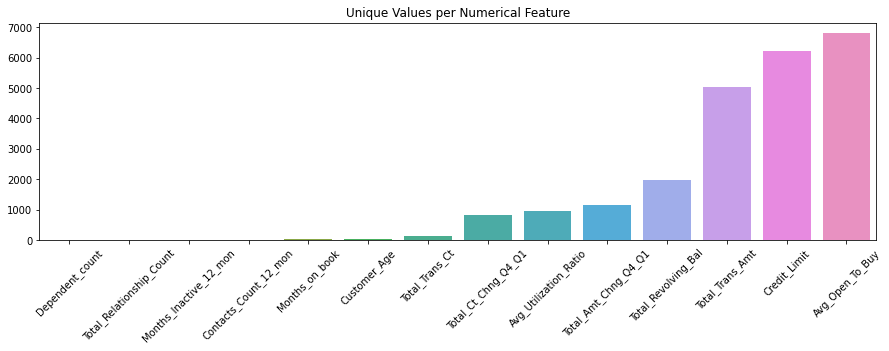

In [14]:
# Examine unique values for numerical features

#Compute number of unique entries for each feature
unique_values = df.select_dtypes(include='number').nunique().sort_values()

# Plot unique values for numerical features
plt.figure(figsize=(15,4))
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.title('Unique Values per Numerical Feature')
plt.xticks(rotation=45)
plt.show()

From the chart, we can see our top three category with the most unique entries is:
- Avg_Open_To_Buy
- Credit_Limit
- Total_Trans_Amt

## Duplicates
This section will look and see if our dataset has any duplicates

In [20]:
# Checking dataframe for duplicates
df.duplicated().sum()

0

We have no duplicates in our dataset

## Missing Values
This section will examine the features that have missing values. It **will not** treat the missing values however. 

In [15]:
# Checking for missing values in our dataset
(round(df.isna().sum() / df.isna().count(),2) * 100).sort_values(ascending=False)

Education_Level             15.0
Income_Category             11.0
Marital_Status               7.0
Attrition_Flag               0.0
Credit_Limit                 0.0
Total_Ct_Chng_Q4_Q1          0.0
Total_Trans_Ct               0.0
Total_Trans_Amt              0.0
Total_Amt_Chng_Q4_Q1         0.0
Avg_Open_To_Buy              0.0
Total_Revolving_Bal          0.0
Months_Inactive_12_mon       0.0
Contacts_Count_12_mon        0.0
Customer_Age                 0.0
Total_Relationship_Count     0.0
Months_on_book               0.0
Card_Category                0.0
Dependent_count              0.0
Gender                       0.0
Avg_Utilization_Ratio        0.0
dtype: float64

Education level, income category and marital status have missing entries
* Education has 15% missing values
* Income category has 11% missing values
* Marital Status has 7% missing values

# EDA
This section will cover data preprocessing, exploratory data analysis (univariate and bivariate)

## Univariate Analysis: Categorical Features

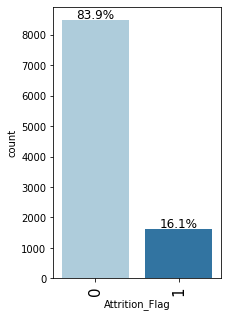

In [27]:
# Barplot for Attrition Flag
labeled_barplot(df, 'Attrition_Flag',perc=True)

* Unbalanced target set
* 16% of the customers left 

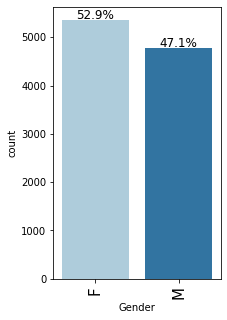

In [28]:
# Barplot for Gender
labeled_barplot(df, 'Gender', perc=True)

* F accounts for 53% of entries
* M accounts for 47%

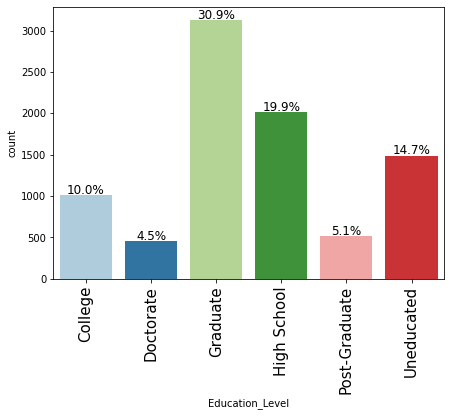

In [29]:
# Barplot for Education Level
labeled_barplot(df, 'Education_Level', perc=True)

In descending order for highest level of education:
* 31% have graduate degrees
* 20% have High School degrees
* 15% are uneducated
* 10% have college degrees
* 5% have post graduate degrees
* 4.5% have doctorates

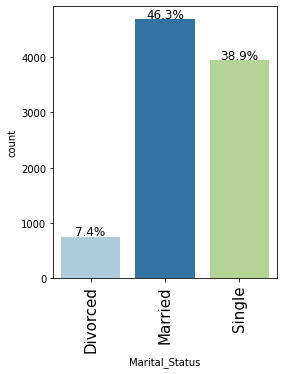

In [30]:
# Barplot for marital status
labeled_barplot(df, 'Marital_Status', perc=True)

46% of the customer base is married, less than 40% is single and less than 10% is single

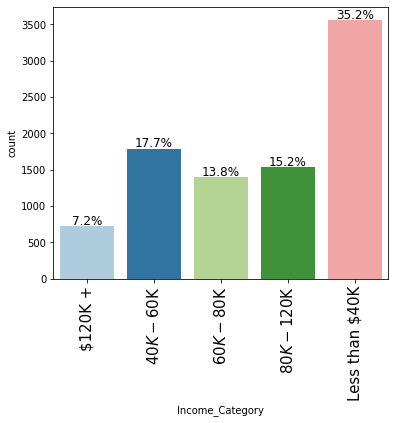

In [31]:
# Barplot for Income Category
labeled_barplot(df, 'Income_Category', perc=True)

Majority of the customers make less than 40k dollars a year by a large amount 

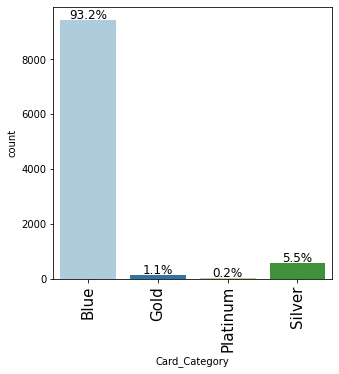

In [32]:
# Barplot for Card Category
labeled_barplot(df, 'Card_Category', perc=True)

Overwhelming majority are blue card members

## Univariate Analysis: Numerical Features

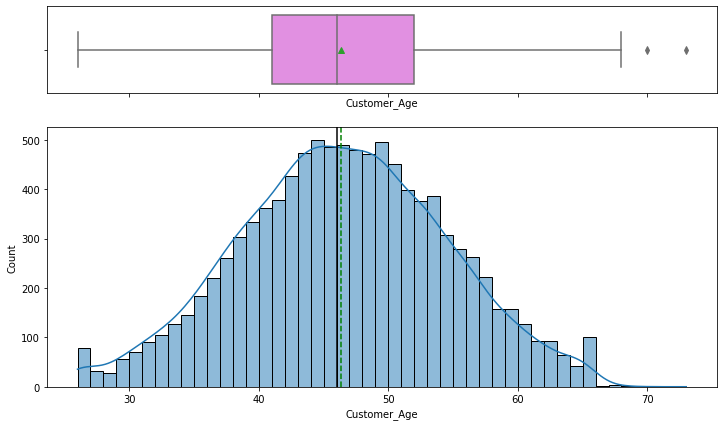

In [33]:
# Histogram and boxplot for Customer Age
histogram_boxplot(df, 'Customer_Age', kde=True)

* Normal distribution
* Avg age around 46 years

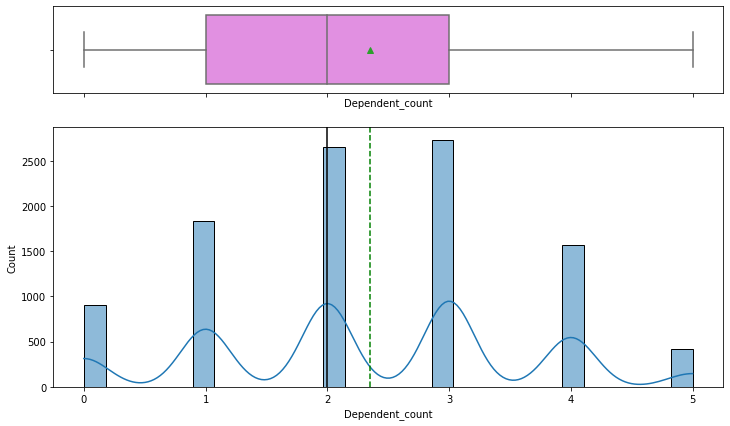

In [34]:
# Histogram and boxplot for number of dependents
histogram_boxplot(df, 'Dependent_count', kde = True)

* Slightly skewed to the right
* Avg number of dependents over 2

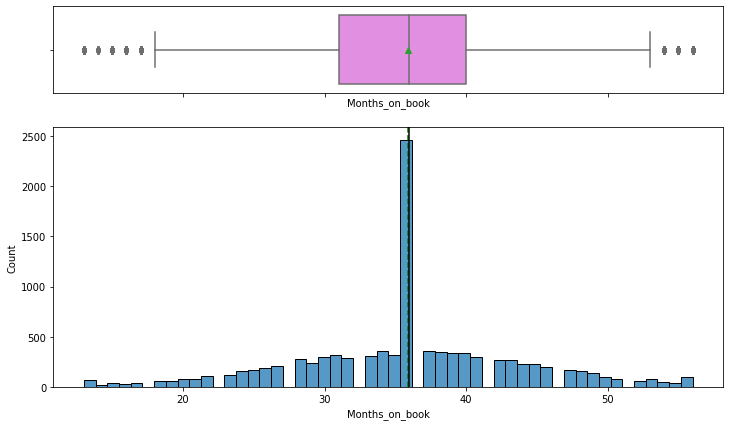

In [35]:
# Histogram and boxplot for customer relationship with the bank
histogram_boxplot(df, 'Months_on_book') 

* Outliers on the higher (>53 months) and lower end (18 months) of the distribution
* Average months around 35 months

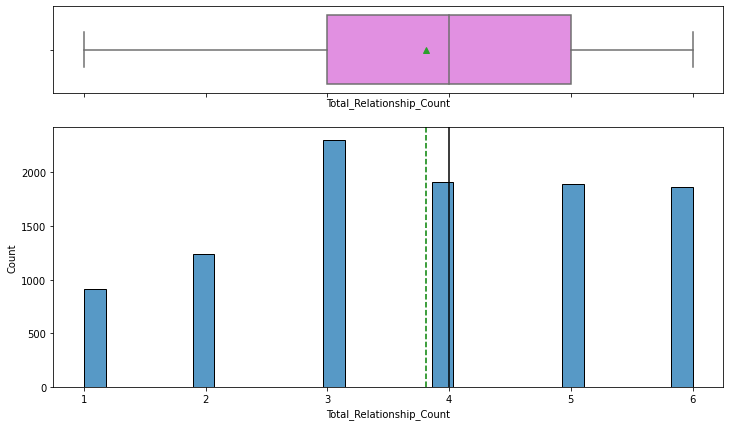

In [36]:
# Univariate analysis for total number of products held by the customer 
histogram_boxplot(df, 'Total_Relationship_Count')

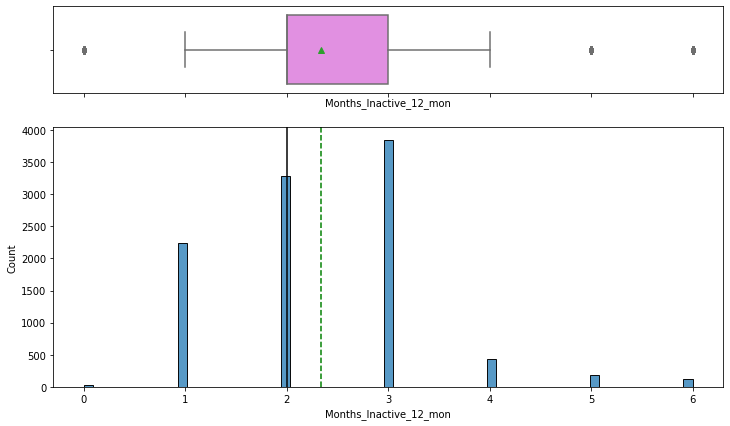

In [37]:
# Histogram and boxplot for Months inactive
histogram_boxplot(df, 'Months_Inactive_12_mon')

* A couple outliers on the higher end (5 and 6 months) and an outlier on the lower (0 months)
* Skewed to the right 
* Average months over 2

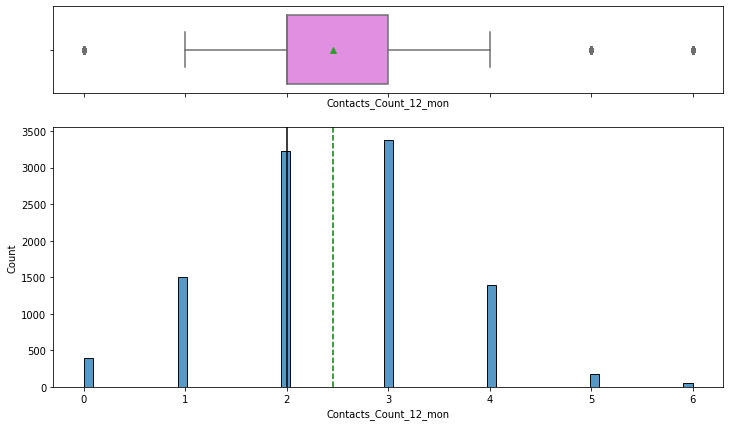

In [38]:
# Histogram and boxplot for No. of Contacts between the customer and bank in the last 12 months
histogram_boxplot(df, 'Contacts_Count_12_mon')

* A couple outliers on the higher end (5 and 6 months) and an outlier on the lower (0 months)
* Skewed to the right 
* Average months over 2

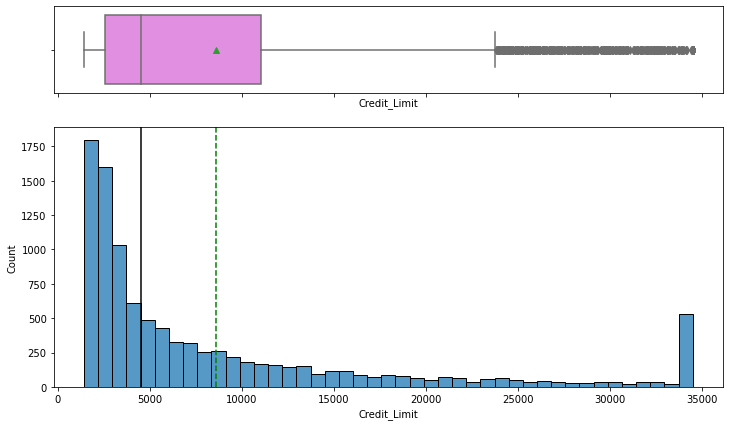

In [39]:
# Histogram and boxplot for Credit Limit
histogram_boxplot(df, 'Credit_Limit')

* Skewed right
* Customers with the bank tend to have a low credit limit, but we do see outliers at the higher end (>25,000 dollars)

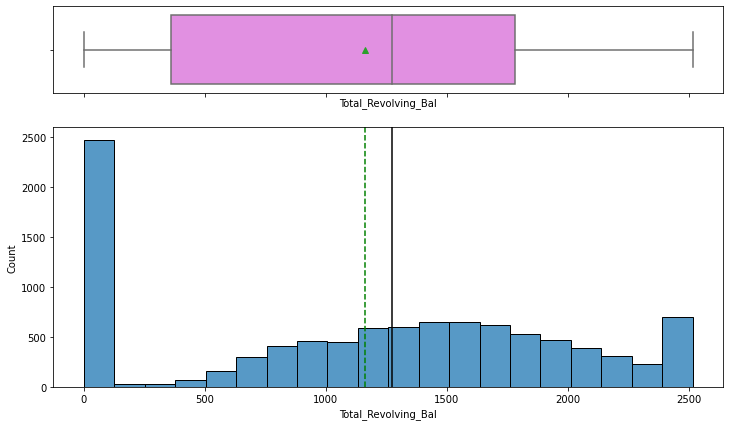

In [40]:
# Histogram and boxplot for balance that carries over to the next month
histogram_boxplot(df, 'Total_Revolving_Bal')

* Large count of customers don't have a balance that rolls over, but the average amount is around 1100 dollars

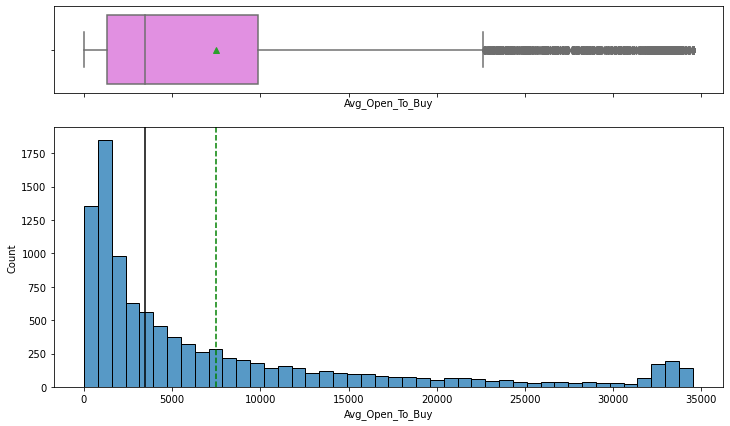

In [41]:
# histogram and boxplot amount left on the credit card to use 
histogram_boxplot(df, 'Avg_Open_To_Buy')

* data skewed heavily to the right
* outliers on the higher end (>24000 dollars)

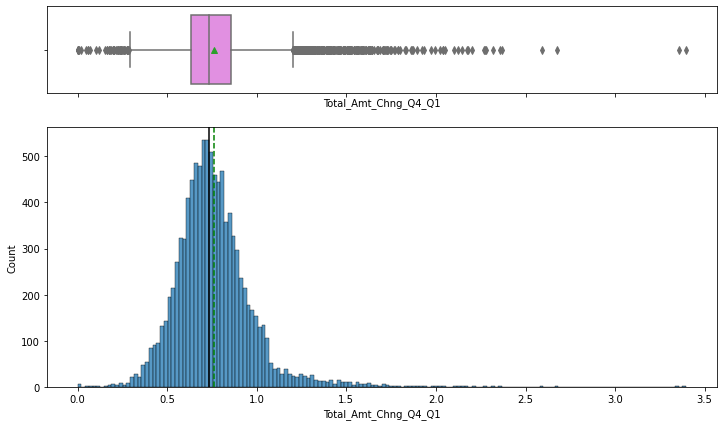

In [42]:
# Histogram and boxplot for total transaction amount in 4th quarter and the total transaction amount in 1st quarter
histogram_boxplot(df, 'Total_Amt_Chng_Q4_Q1')

* Outliers present
* Mean a bit shifted to the right of the median (around 0.75)

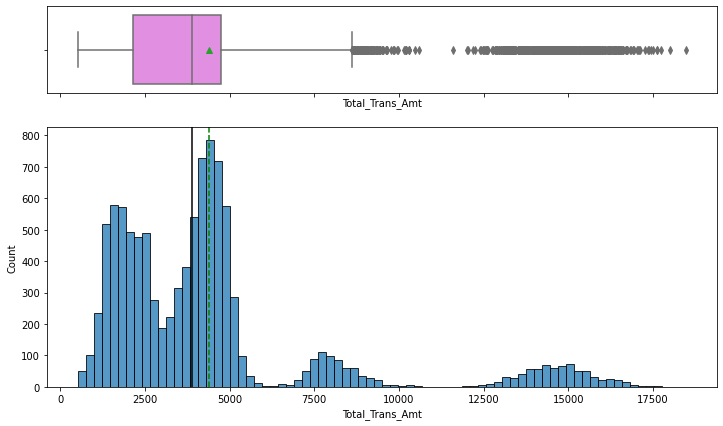

In [43]:
# Histogram and boxplot for total transactions in the last 12 months
histogram_boxplot(df, 'Total_Trans_Amt')

* Multimodal distribution
* Outliers past ~8000 dollars 
* Will be interesting to dig deeper into this in the bivariate analysis


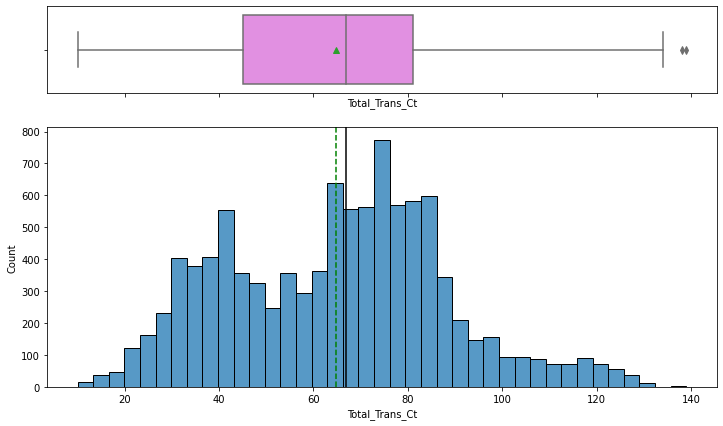

In [44]:
# Histogram and boxplot for Total number of transactions
histogram_boxplot(df, 'Total_Trans_Ct')

* Bimodal distribution 
* Outliers around 140 transactions

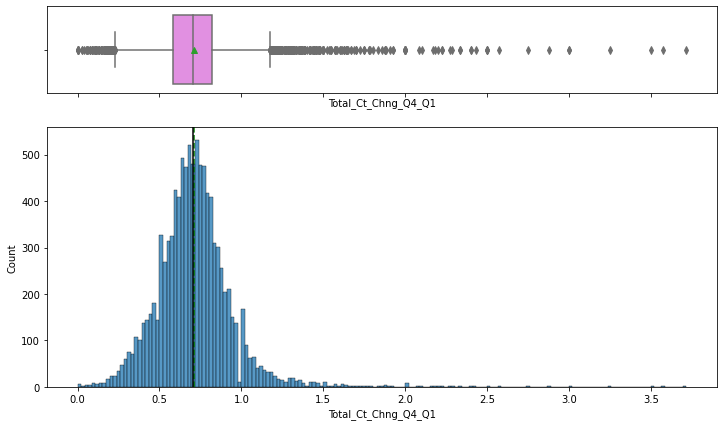

In [45]:
# Histogram and boxplot for the ratio of total number of transactions in Q4 and Q1
histogram_boxplot(df,'Total_Ct_Chng_Q4_Q1')

* Outliers skewing distribution to the right

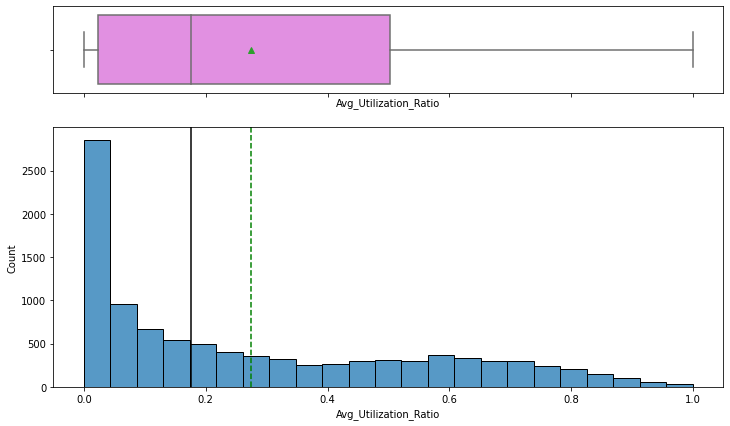

In [46]:
# Histogram and boxplot for average utilization ratio
histogram_boxplot(df, 'Avg_Utilization_Ratio')

* Spike at 0
* Right skewed distrobution

## Bivariate Analysis

In [47]:
# Calculating feature correlation to be used for the correlation matrix
df_corr = df.corr()

In [48]:
# Create labels to make the Strong, Medium and Weak correlations more clear
# I will define strong correlation as > 0.75
# I will define medium correlation as > 0.50
# I will define weak correlation as > 0.25

labels = np.where(
    np.abs(df_corr) > 0.75, 
    'S', 
    np.where(np.abs(df_corr) > 0.5, 'M', 
            np.where(np.abs(df_corr) > 0.25, 'W', '')),
)

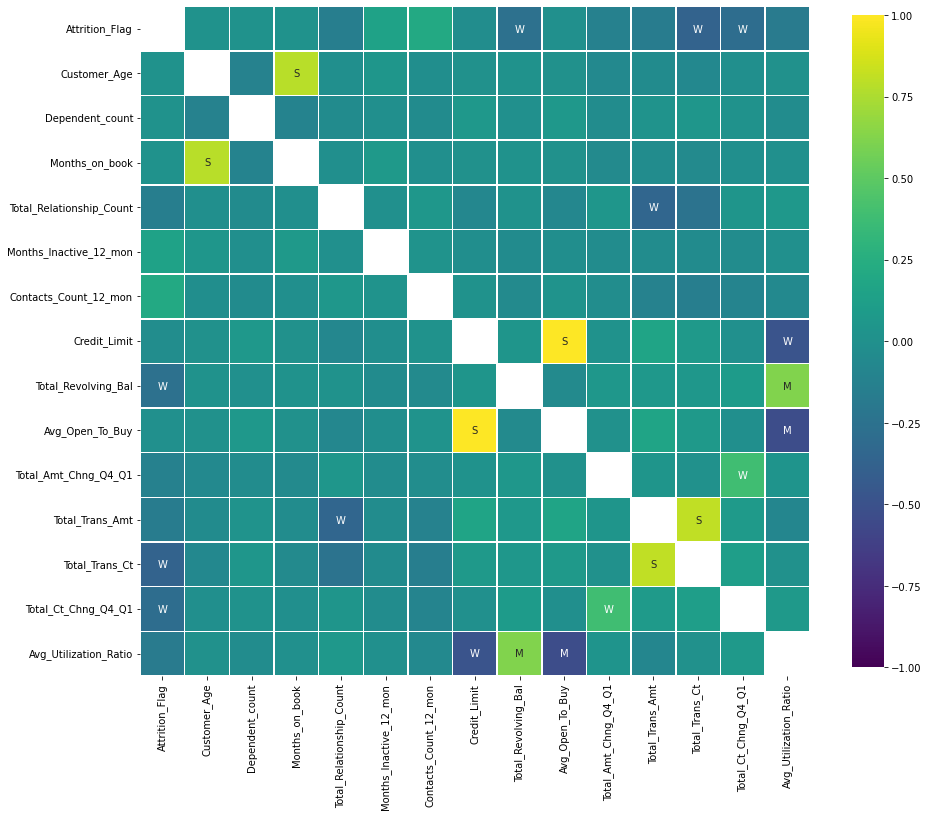

In [49]:
# Plot correlation matrix with the diagonals masked
plt.figure(figsize=(15,15))
sns.heatmap(
    df_corr, 
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt='',
    linewidths=0.5,
    cmap='viridis',
    cbar_kws={'shrink':0.8},
    vmin=-1, 
    vmax=1
);

Strong correlation between:
* Customer age and period of relationship with bank
* Credit limit and avg open to buy
* Total transaction amount to total number of transactions

Medium correlation between: 
* Total revolving balance to avg utilization ratio
* Avg open to buy to avg utilization ratio

Weak correlation between:
* Attrition Flag to ratio of total number transactions Q4 to Q1
* Attrition Flag to total number of transactions
* Attrition Flag to total revolving balance

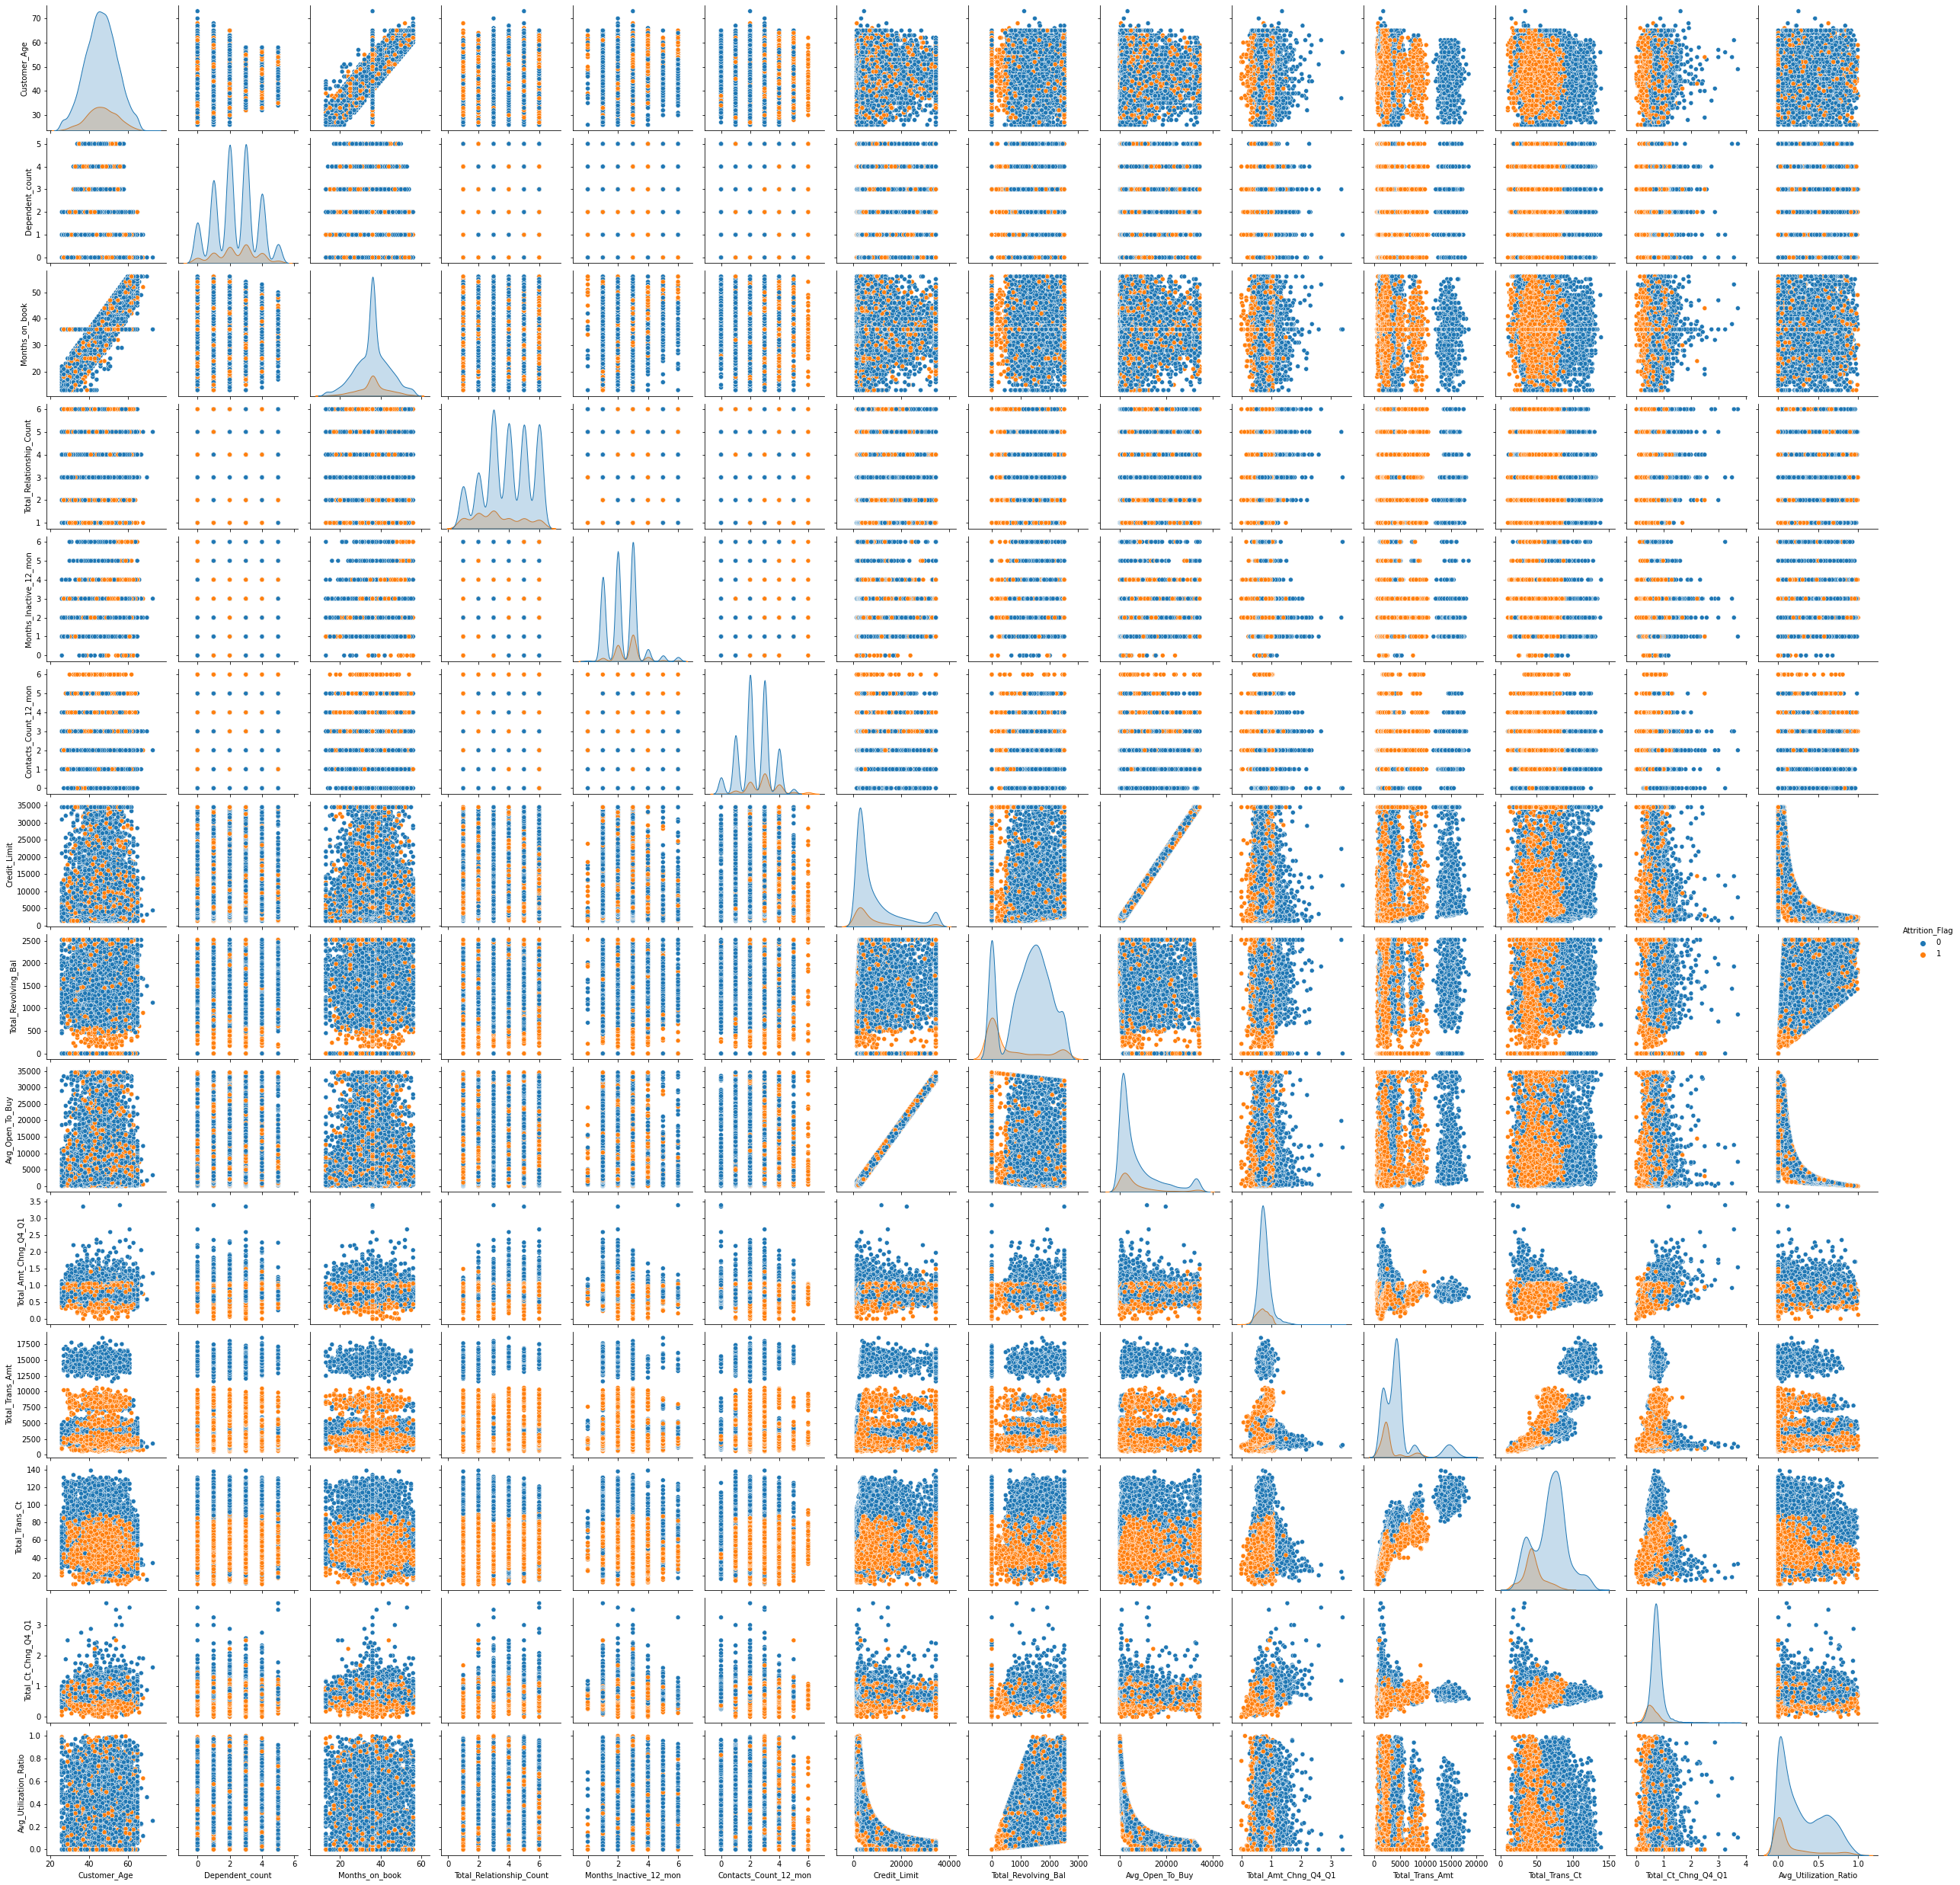

In [50]:
# Let's take a deeper dive into the feature correlations with pair plots
sns.pairplot(data=df, hue='Attrition_Flag', diag_kind='kde');

Key Observations from pairplot:
* Older customers tend to have a longer relationship with the bank
    * There also seems to be an odd horizontal trend at 35 months that needs to be investigated
* We can see some patterns where we have conglomerations of attrited customers from the rest of the data such as plots for credit limit and number of times a customer contacted a bank. However, we see some strong trends with this for the following:
    * Total revolving balance for all features on the x axis. Majority of the customers that attrite tend to have revolving balances less than 500 dollars for ages ~28 - 64 years
    * Customers with a ration less than or equal to 1 for total amount change from Q4 to Q1 tend to attrite
    * Customers who attrite tend to have total transactions amounts less than 10,000 dollars for all features on the x axis. In addition, customers who have total transaction amounts less than 10,000 dollars and a ratio of total amount change from Q4 to Q1 of 1 or less
    * Total number of transactions of 80 or less tend to attrite for all features. In addition, customers with total number of transactions and ratio of total amount change of 1 or less tend to attrite. We also see an interesting pattern for this variable and total transaction amount. We see there is an upwards trend for attrition as the total transaction amount increases until it hits a bit over ~13k. Customers above this limit and with transactions greater than 80 tend to stay as existing customers
    * Total count change from Q4 to Q1 of 1 or less lead to attrition for all variables 
* We see a couple interesting exponential trends for avg utilization and credit limit. The higher the credit limit, the lower the utilization. Same trend for utilization and avg_open_to_buy
* There's a strong relationship between credit limit and avg_open_to_buy so we can delete the latter. Looking at the rest of the relationships, the meaning for impact will be captured from credit limit

In [20]:
# Importing plotly to make the following data analysis easier
import plotly.express as px

In [21]:
# Taking another look at the months on book and customer age scatter plot to investigate the horizontal line we observed
px.scatter(data_frame=df, x='Customer_Age', y='Months_on_book', )

* It looks like our data observes an odd trend at the 36 month mark. Let's take a closer look at the data for that variable

In [27]:
# Display rows where month on book equals 36 and age is less than 40
df[df['Months_on_book']==36][df['Customer_Age']<40]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
8      Existing Customer            37      M                3   
241    Existing Customer            39      M                2   
366    Existing Customer            36      F                4   
426    Attrited Customer            39      M                2   
452    Existing Customer            39      F                1   
...                  ...           ...    ...              ...   
10100  Existing Customer            39      M                2   
10102  Existing Customer            33      F                1   
10113  Attrited Customer            27      M                0   
10115  Existing Customer            38      M                1   
10125  Attrited Customer            30      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
8          Uneducated         Single     $60K - $80K          Blue   
241       High School         Single    $80K - $120K          Blue   
366          Graduate        Married     $40K - $60K          Blue   
426        Uneducated         Single     $60K - $80K          Blue   
452               NaN         Single     $40K - $60K          Blue   
...               ...            ...             ...           ...   
10100        Graduate            NaN     $60K - $80K        Silver   
10102      Uneducated         Single  Less than $40K          Blue   
10113     High School       Divorced     $60K - $80K          Blue   
10115      Uneducated         Single     $40K - $60K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
8                  36                         5                       2   
241                36                         4                       2   
366                36                         6                       3   
426                36                         5                       3   
452                36                         6                       1   
...               ...                       ...                     ...   
10100              36                         4                       2   
10102              36                         5                       3   
10113              36                         2                       3   
10115              36                         2                       3   
10125              36                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
8                          0       22352.0                 2517   
241                        2        5269.0                 1475   
366                        3        1628.0                  969   
426                        3       13961.0                 1299   
452                        3       11213.0                    0   
...                      ...           ...                  ...   
10100                      2       29808.0                    0   
10102                      3        8398.0                 1875   
10113                      2       13303.0                 2517   
10115                      2        5639.0                 1558   
10125                      3        5281.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
8              19835.0                 3.355             1350              24   
241             3794.0                 1.148             2094              25   
366              659.0                 0.999             1893              15   
426            12662.0                 0.842              783              20   
452            11213.0                 0.563             1257              23   
...                ...                   ...              ...             ...   
10100          29808.0                 0.669            16098             128   
10102           6523.0

In [28]:
# Display rows where month on book equals 36 and age is greater than 56
df[df['Months_on_book']==36][df['Customer_Age']>56]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
138    Existing Customer            63      F                1   
143    Existing Customer            59      F                1   
161    Existing Customer            59      F                1   
178    Existing Customer            57      F                2   
179    Existing Customer            59      F                1   
...                  ...           ...    ...              ...   
9799   Existing Customer            58      F                0   
9980   Existing Customer            61      F                1   
9992   Attrited Customer            58      M                1   
10059  Existing Customer            59      F                2   
10075  Existing Customer            57      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
138           College        Married             NaN          Blue   
143          Graduate         Single  Less than $40K          Blue   
161           College         Single             NaN          Blue   
178        Uneducated         Single     $40K - $60K        Silver   
179        Uneducated        Married     $40K - $60K          Blue   
...               ...            ...             ...           ...   
9799       Uneducated            NaN             NaN          Blue   
9980         Graduate         Single  Less than $40K          Blue   
9992         Graduate         Single    $80K - $120K          Blue   
10059      Uneducated        Married  Less than $40K          Blue   
10075      Uneducated         Single  Less than $40K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
138                36                         6                       2   
143                36                         3                       2   
161                36                         2                       3   
178                36                         6                       3   
179                36                         4                       2   
...               ...                       ...                     ...   
9799               36                         1                       2   
9980               36                         3                       2   
9992               36                         6                       3   
10059              36                         6                       3   
10075              36                         5                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
138                        3        3967.0                 1568   
143                        3        6335.0                 1128   
161                        3        4224.0                 1305   
178                        0       19482.0                 1072   
179                        3        3356.0                  985   
...                      ...           ...                  ...   
9799                       3        3736.0                 2209   
9980                       2        3466.0                 1444   
9992                       4       22718.0                    0   
10059                      2        3850.0                    0   
10075                      2        8224.0                 1239   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
138             2399.0                 1.236             1657              29   
143             5207.0                 0.397             1217              20   
161             2919.0                 0.852             1152              31   
178            18410.0                 0.706             1421              22   
179             2371.0                 0.350              999              28   
...                ...                   ...              ...             ...   
9799            1527.0                 0.980            15886             118   
9980            2022.0

* Looking at these datasets, the situation doesn't seem unrealistic. It's realistic for people in their 30s or even late into their 50's and 60's to be with a bank for 3 years for a variety of situation. There's a couple ways I can think of to approach this:
1. Replace either customer age or months on book with np.nan and let imputaiton later on replace them with the median
2. Revisit this relationship after we do log transformation (for outlier treatment) and see if it's still an issue. 

I'm going to choose the latter for now

In [12]:
# Dropping avg_open_to_buy column 
df.drop('Avg_Open_To_Buy', axis=1, inplace=True)

In [30]:
num_cols

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [13]:
# Updating our numerical columns list
num_cols.remove('Avg_Open_To_Buy')

### Target Value vs Categorical Features

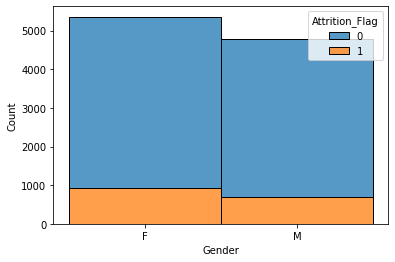

In [54]:
# Stacked histogram for Gender vs Attrition Flag
sns.histplot(df, x='Gender', hue='Attrition_Flag', multiple='stack');

* Females attrited more than males

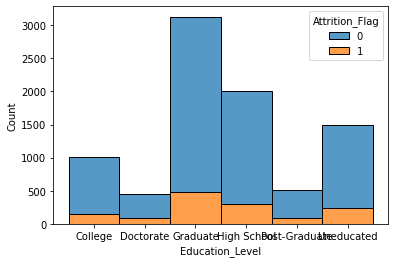

In [55]:
# Stacked histogram for Education Level vs Attrition Flag
sns.histplot(df, x='Education_Level', hue='Attrition_Flag', multiple='stack');

* We noticed the distribution for attrited customers matches the overall distribution (i.e. customers with graduate degrees attrited the most)

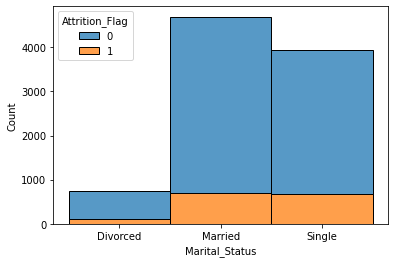

In [56]:
# Stacked histogram for Marital Status vs Attrition Flag
sns.histplot(df, x='Marital_Status', hue='Attrition_Flag', multiple='stack');

We see almost an equal amount of married and single customers attrited even though there's a greater number of marrried customers

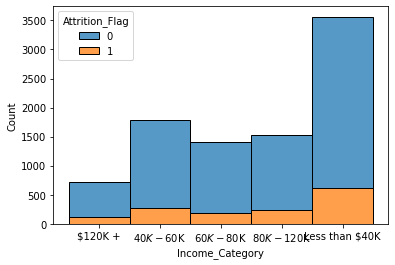

In [57]:
# Stacked histogram for Income Category vs Attrition Flag
sns.histplot(df, x='Income_Category', hue='Attrition_Flag', multiple='stack');

See the same pattern for attrited customers as the overall distribution. Highest attrition in customers who make less than 40k dollars

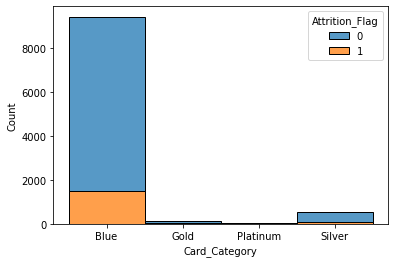

In [58]:
# Stacked histogram for Card Category vs Attrition Flag
sns.histplot(df, x='Card_Category', hue='Attrition_Flag', multiple='stack');

Largest attrition in blue card members but a large imbalanced favoring blue card members

### Target Value vs Numerical Features
This section is to examine the relationship between our target value (Attrition Flag) and the numerical features

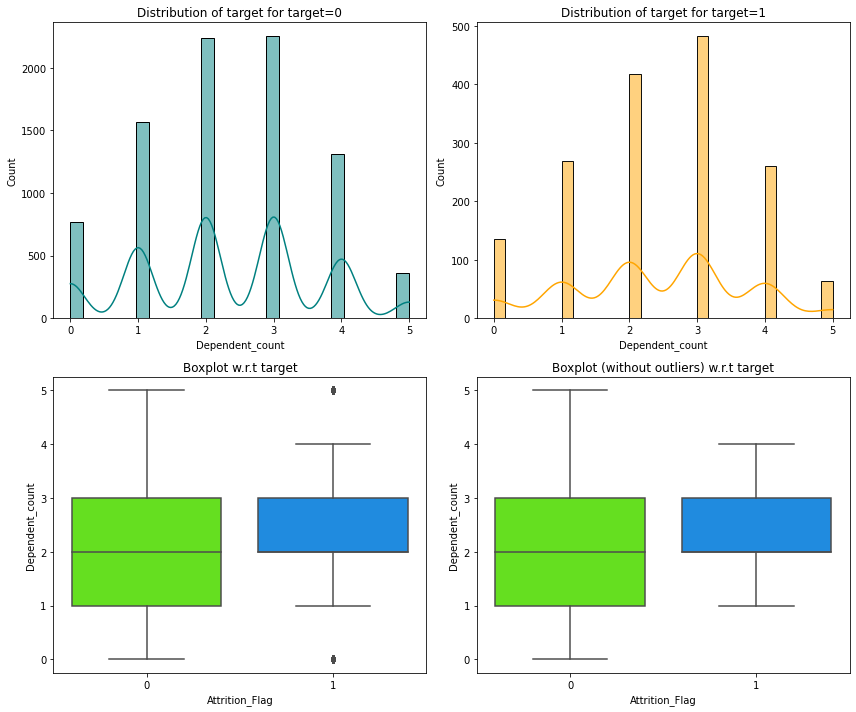

In [90]:
# Number of dependents vs Attrition
distribution_plot_wrt_target(df, 'Dependent_count', 'Attrition_Flag')

* From the boxplot, you can see that customers with 0-2 dependents tend to remain as existing customer
* For 2-3 dependents, there's an overlap with customers who attrite. Looking at the histogram, we can see a higher count for existing customers but that could also be due to our dataset favoring the majority

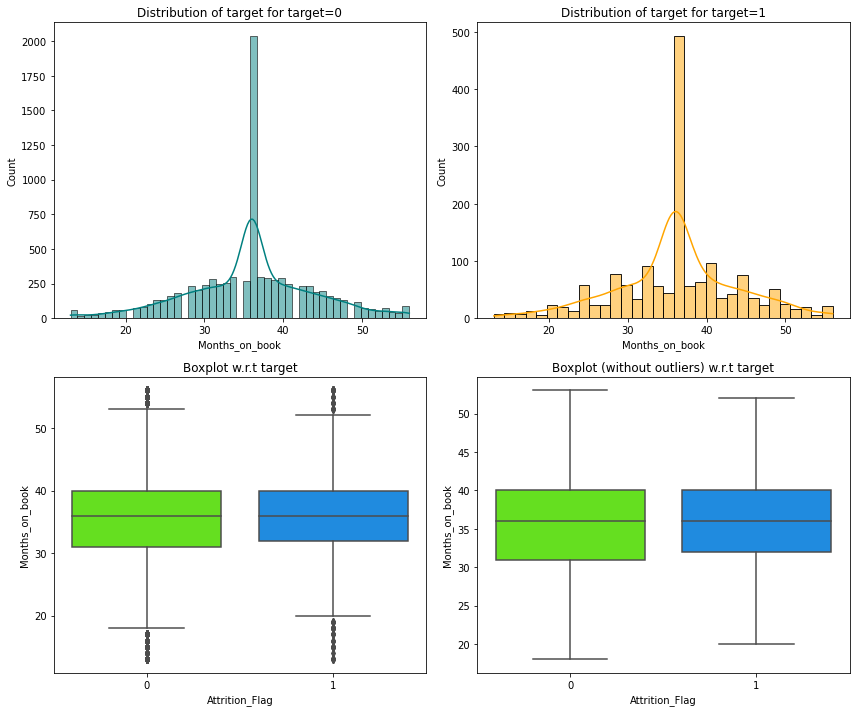

In [91]:
# Months with bank vs Attrition
distribution_plot_wrt_target(df, 'Months_on_book', 'Attrition_Flag')

* Similar distribution for customers who attrite or stay

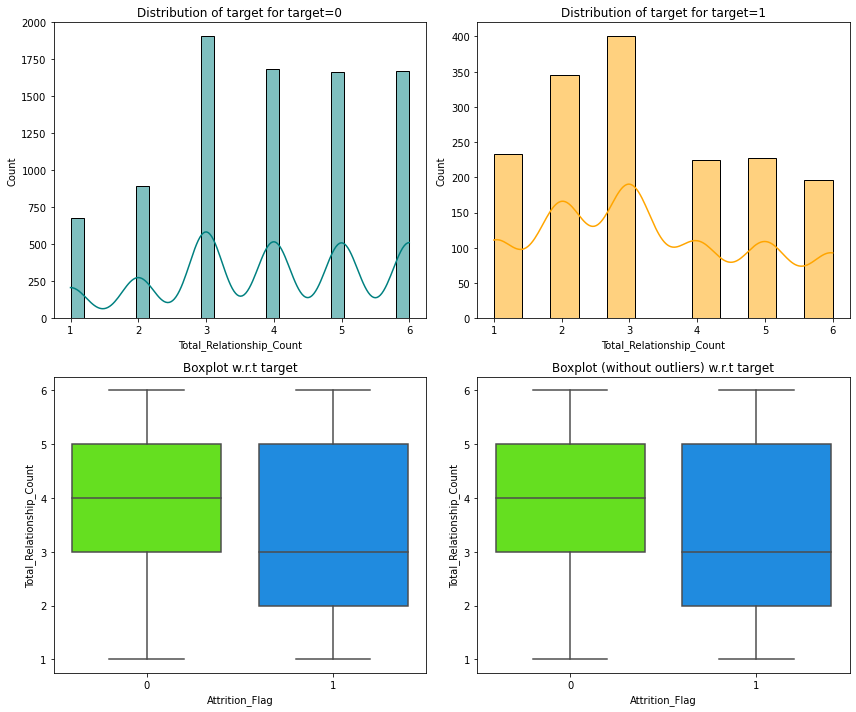

In [93]:
# Total number of products with bank vs Attrition
distribution_plot_wrt_target(df, 'Total_Relationship_Count', 'Attrition_Flag')

* Higher count for customers remaining with the bank if they have 3 or more products with the bank
* Customers with 2-3 products tend to attrite


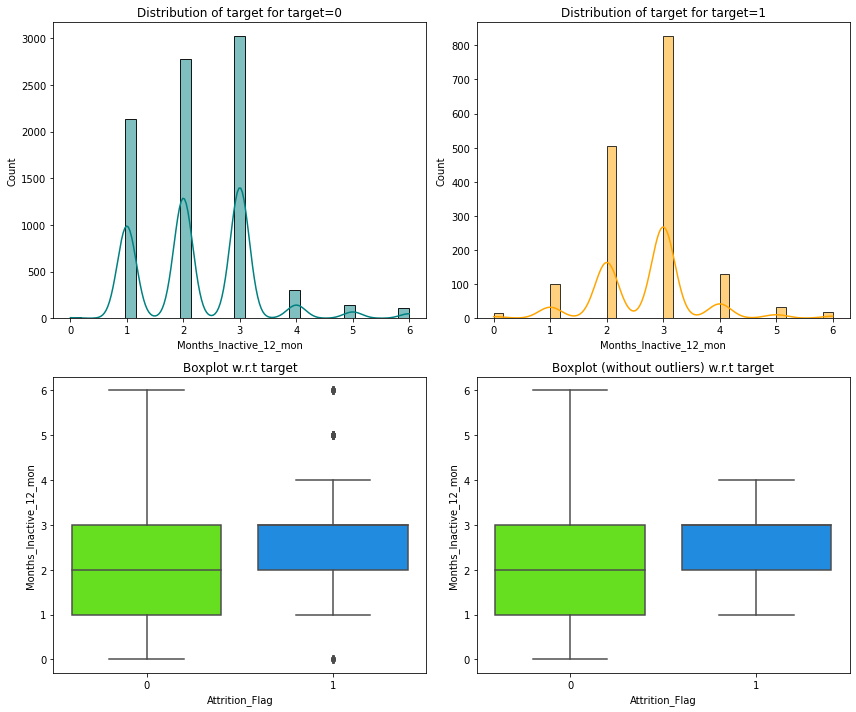

In [94]:
# Months Inactive vs Attrition
distribution_plot_wrt_target(df, 'Months_Inactive_12_mon', 'Attrition_Flag')

* Customers who are only inactive for 0-2 months tend to remain with the bank, but we do notice an outlier for attrition at 0 months
* Overlap for 2-3 months and looking at the histogram, it looks like the count for existing is greater but not by much given the imbalance of our dataset

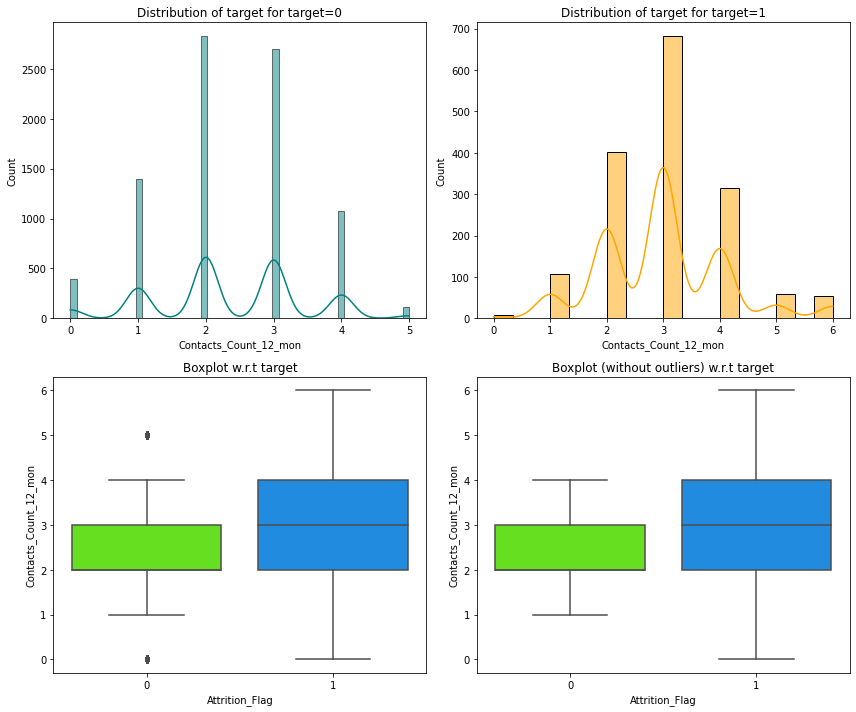

In [95]:
# Contacts_Count_12_mon vs Attrition
distribution_plot_wrt_target(df, 'Contacts_Count_12_mon', 'Attrition_Flag')

* Customers who have to contact the bank a lot (3+ times) tend to attrite

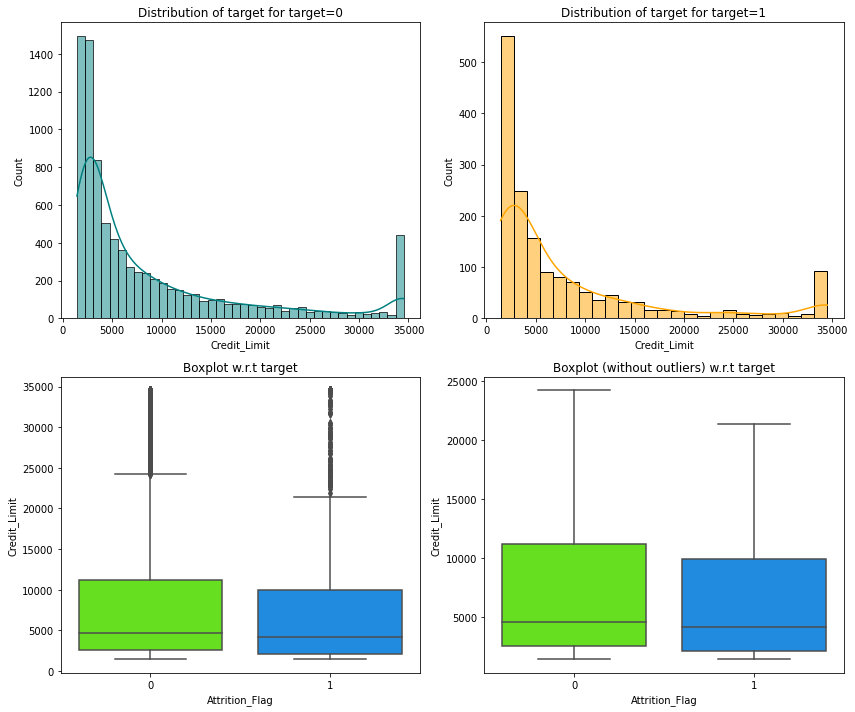

In [96]:
# Credit Limit vs Attrition
distribution_plot_wrt_target(df, 'Credit_Limit', 'Attrition_Flag')

* Right skewness for both 0/1 labels
* Customers with credit limit higher than 10k tend to stay as customers

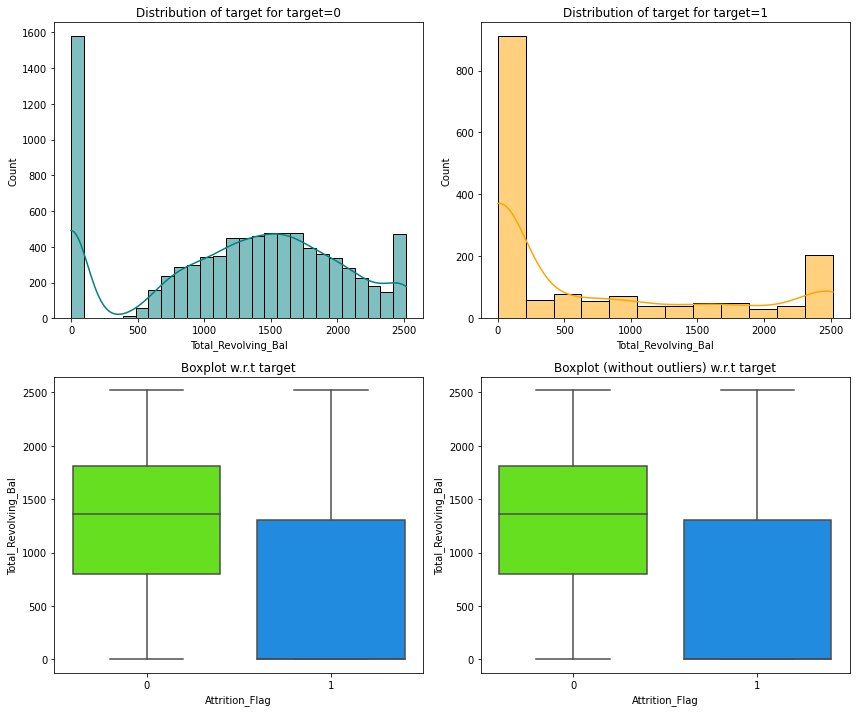

In [97]:
# Total Revolving balance vs Attrition
distribution_plot_wrt_target(df, 'Total_Revolving_Bal', 'Attrition_Flag')

Customers with higher revolving balance (>~1400) tend to stay on as customers

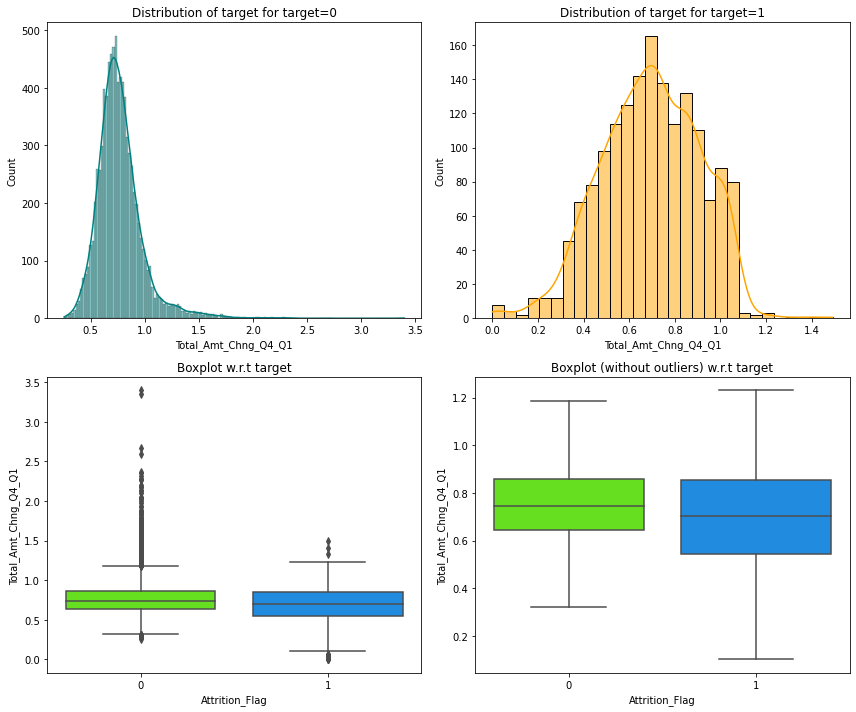

In [98]:
# Total_Amt_Chng_Q4_Q1 vs Attrition
distribution_plot_wrt_target(df, 'Total_Amt_Chng_Q4_Q1','Attrition_Flag')

Customers with ratios less than ~0.63 tend to attrite

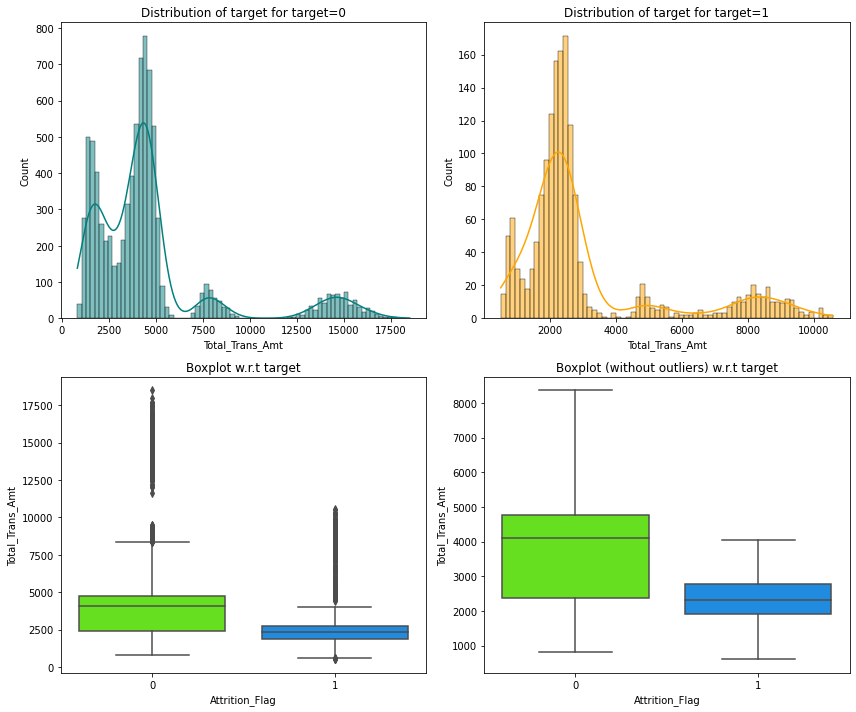

In [99]:
# Total_Trans_Amt vs Attrition
distribution_plot_wrt_target(df, 'Total_Trans_Amt', 'Attrition_Flag')

* Customers with low transaction amounts (<2400) tend to attrite

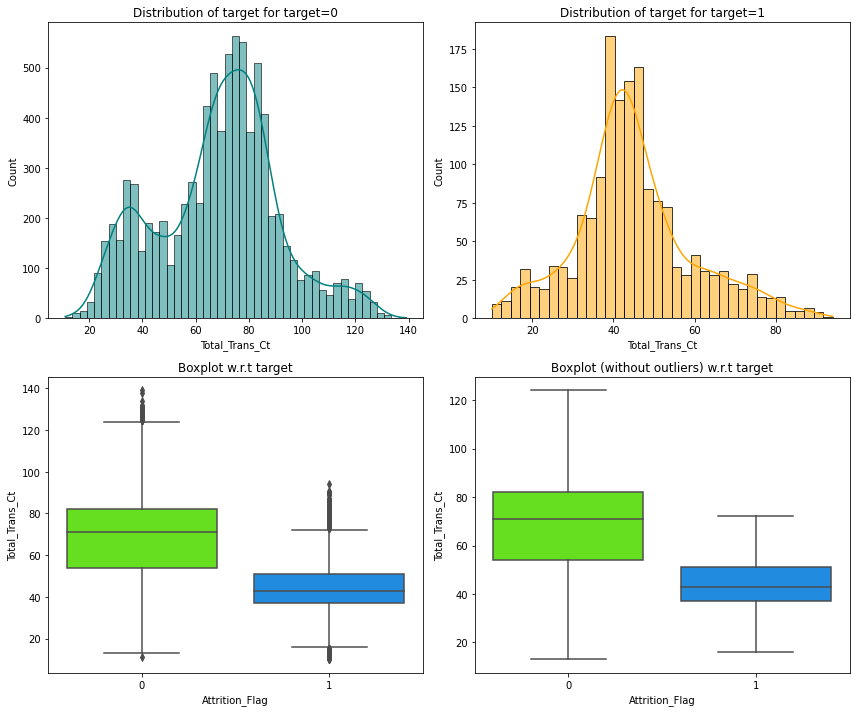

In [100]:
# Total_Trans_Ct vs Attrition
distribution_plot_wrt_target(df, 'Total_Trans_Ct', 'Attrition_Flag')

Customers with low number of transactions attrite. Likely alluding to their lack of use.

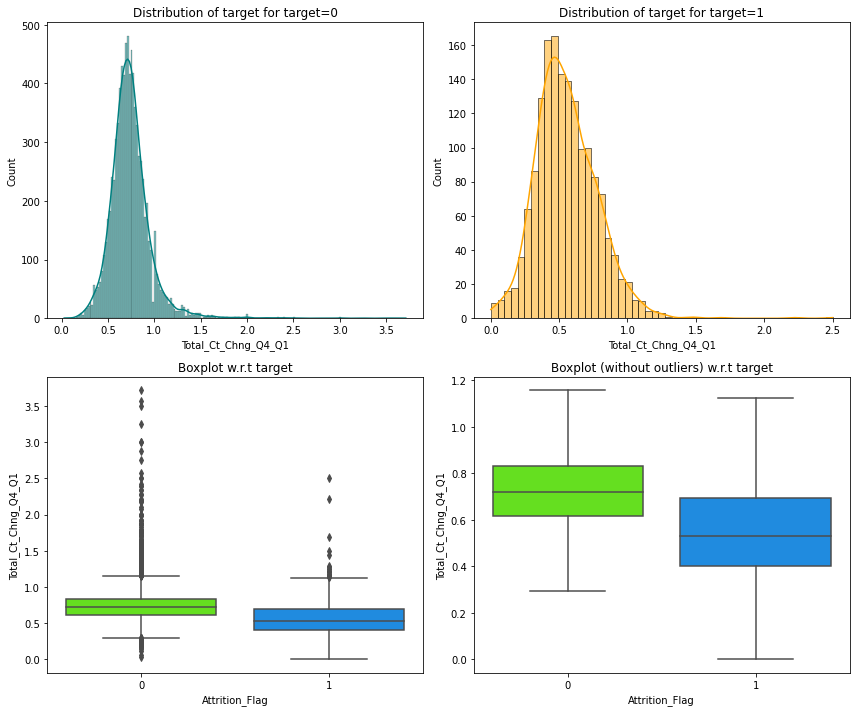

In [101]:
# Total_Ct_Chng_Q4_Q1 vs Attrition
distribution_plot_wrt_target(df, 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')

Customers with lower ratios tend to attrite

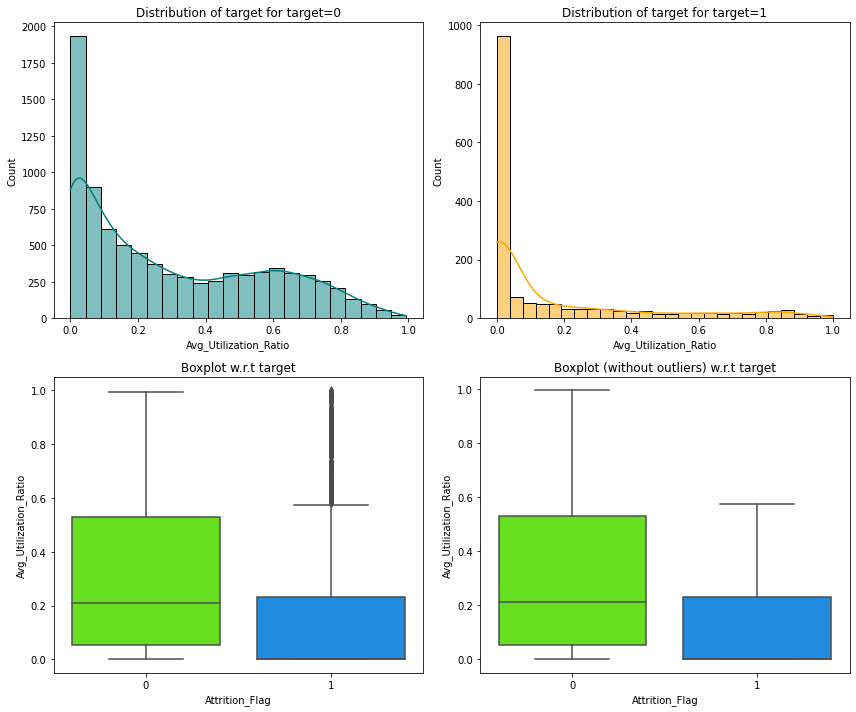

In [102]:
# Avg_Utilization_Ratio vs Attrition
distribution_plot_wrt_target(df, 'Avg_Utilization_Ratio', 'Attrition_Flag')

* Right skewed distribution
* Customers who use higher use tend to stay on as existing customers

### Characterize Card Members

This section will go through the feature set and look at how the demographic for the different card members looks like. I'll save the demographics until the end

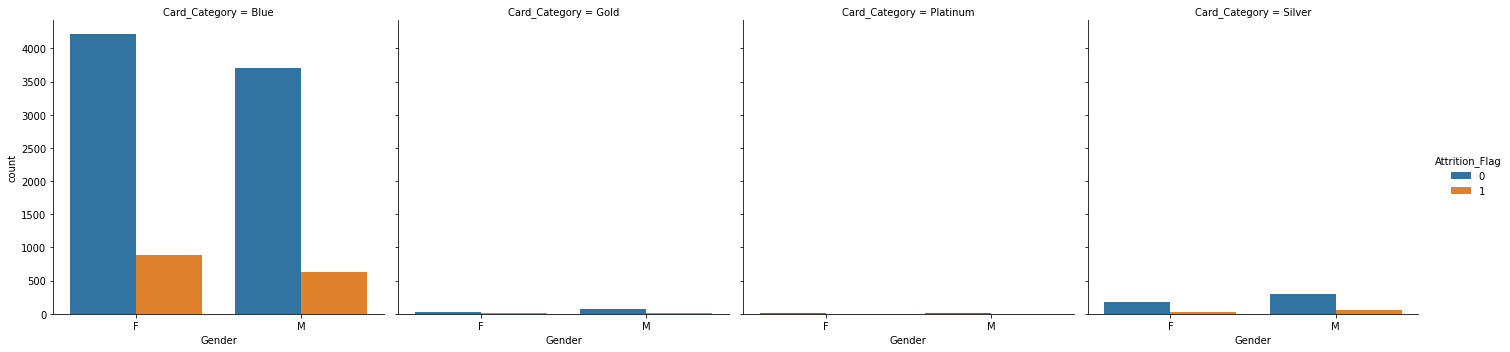

In [109]:
# Card Cat vs Gender
sns.catplot(x='Gender', hue='Attrition_Flag', col='Card_Category', data=df, kind='count')

In [61]:
# Printing value counts to better analyze the last three boxes
pd.DataFrame(round(df.groupby(['Card_Category'])['Gender'].value_counts(1),2))

Gender
Card_Category          
Blue          F    0.54
              M    0.46
Gold          M    0.67
              F    0.33
Platinum      M    0.55
              F    0.45
Silver        M    0.62
              F    0.38

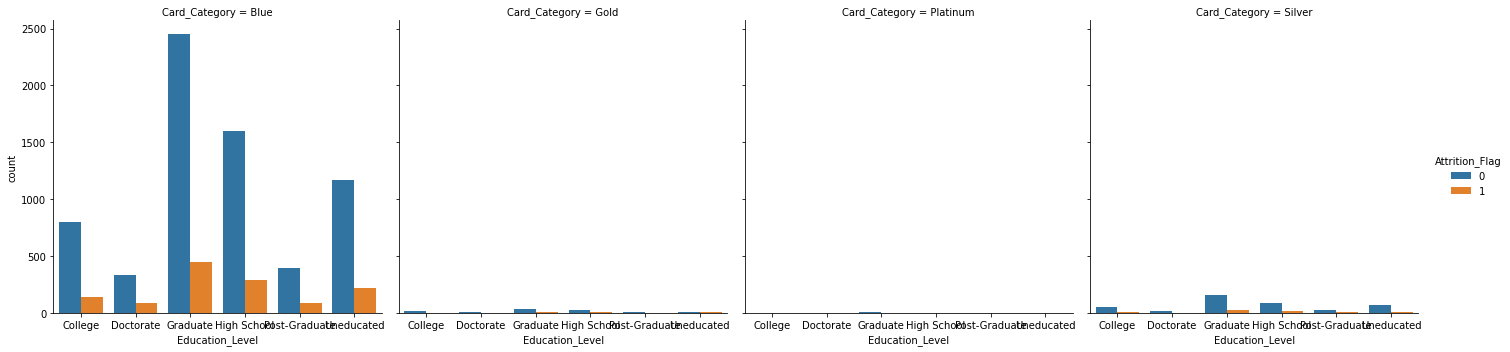

In [114]:
# Card Cat vs Education Level
sns.catplot(x='Education_Level', hue='Attrition_Flag', col='Card_Category', data=df, kind='count')

In [62]:
# Printing value counts to better analyze the last three boxes
pd.DataFrame(round(df.groupby(['Card_Category'])['Education_Level'].value_counts(1),2))

Education_Level
Card_Category                               
Blue          Graduate                  0.36
              High School               0.24
              Uneducated                0.17
              College                   0.12
              Post-Graduate             0.06
              Doctorate                 0.05
Gold          Graduate                  0.37
              High School               0.27
              College                   0.15
              Uneducated                0.11
              Doctorate                 0.05
              Post-Graduate             0.05
Platinum      Graduate                  0.47
              Post-Graduate             0.18
              Uneducated                0.18
              Doctorate                 0.12
              High School               0.06
              College                   0.00
Silver        Graduate                  0.39
              High School               0.21
              Uneducated                0.17
              College                   0.12
              Post-Graduate             0.07
              Doctorate                 0.05

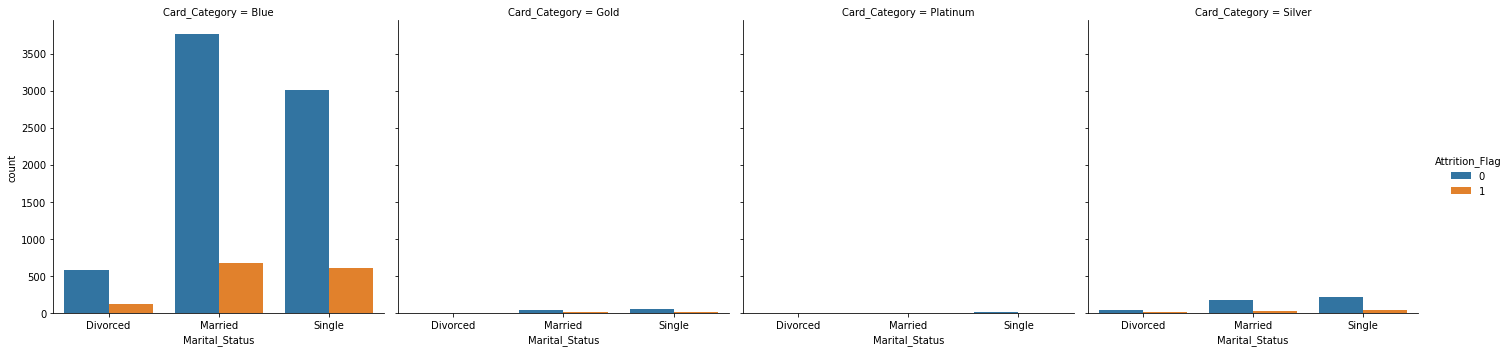

In [115]:
# Card Cat vs Marital Status
sns.catplot(x='Marital_Status', hue='Attrition_Flag', col='Card_Category', data=df, kind='count')

In [64]:
# Printing value counts to better analyze the last three boxes
pd.DataFrame(df.groupby(['Card_Category'])['Marital_Status'].value_counts(1))

Marital_Status
Card_Category                         
Blue          Married         0.506455
              Single          0.414029
              Divorced        0.079516
Gold          Single          0.557692
              Married         0.394231
              Divorced        0.048077
Platinum      Single          0.555556
              Married         0.388889
              Divorced        0.055556
Silver        Single          0.499006
              Married         0.409543
              Divorced        0.091451

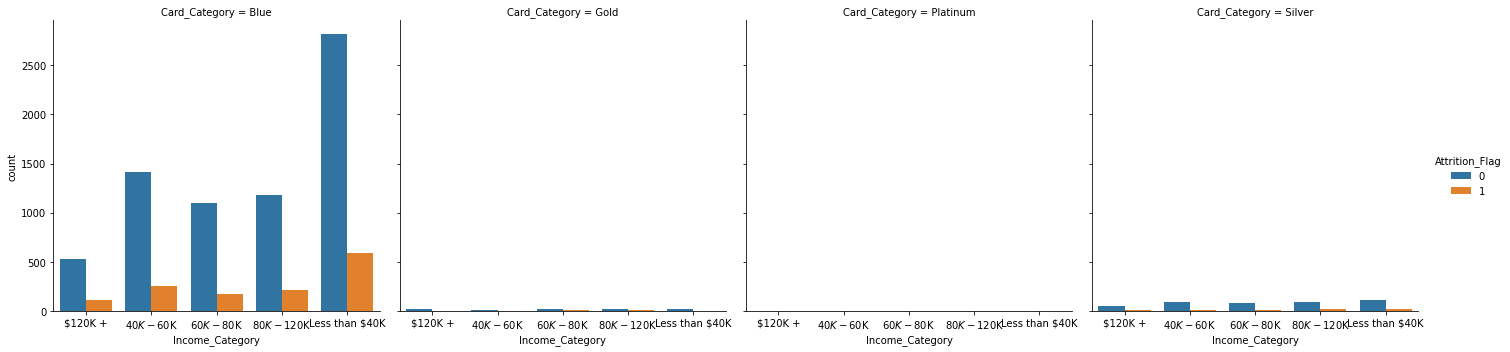

In [121]:
# Card Cat vs Income Category
sns.catplot(x='Income_Category', hue='Attrition_Flag', col='Card_Category', data=df, kind='count')

In [65]:
# Printing value counts to better analyze the last three boxes
pd.DataFrame(df.groupby(['Card_Category'])['Income_Category'].value_counts(1))

Income_Category
Card_Category                                
Blue          Less than $40K         0.405554
              $40K - $60K            0.199619
              $80K - $120K           0.166250
              $60K - $80K            0.151710
              $120K +                0.076868
Gold          $60K - $80K            0.271028
              Less than $40K         0.224299
              $80K - $120K           0.196262
              $120K +                0.168224
              $40K - $60K            0.140187
Platinum      $120K +                0.266667
              $60K - $80K            0.266667
              Less than $40K         0.266667
              $80K - $120K           0.133333
              $40K - $60K            0.066667
Silver        Less than $40K         0.258964
              $80K - $120K           0.233068
              $40K - $60K            0.197211
              $60K - $80K            0.191235
              $120K +                0.119522

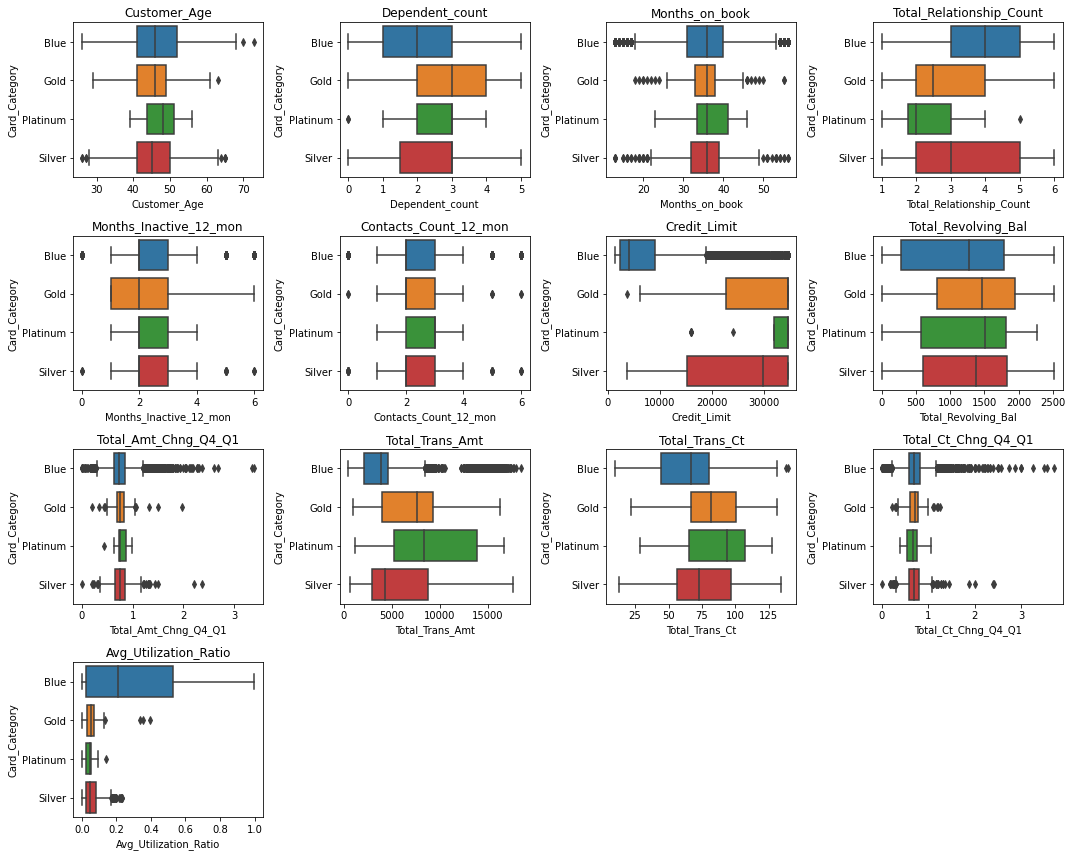

In [79]:
# Let's take a deeper dive into how the card categories breakout based on the numerical features
# Plotting boxplots of our numerical data
plt.figure(1,figsize=(15,12))

for i,name in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df, x=name, y='Card_Category')
    plt.tight_layout()
    plt.title(name)
    
plt.show()

## EDA Summary and Key Observations

Note: Functions for plotting histogram and box plots, labeled barplots, etc are located in the Appendix

Below I've listed out the key obersvations made from our univariate and bivariate EDA and I also looked at the card category demographic. I'll note that there was an imbalance in the card category so the Gold, Platinum and Silver member demographics needs more sample points to further refine the demographic's characteristics

Key Observations: 

* Unbalanced target set with 16% attrition rate
* Majority of the customer base is female
* Majority are married or single
* Large majority make less than 40k dollars per year
* Overwhelming majority are Blue card members
* Customers tend to have credit limits on the lower end of the range
* Customers with 0-2 dependents tend to stay on as a customer 
* Customers with 2-3 products tend to attrite
* Customers who have to contact the bank multiple times throughout the year (3+) tend to leave
* Customers who have a high utilization rate tend to stay as customers


Generalizations for different card members:
Blue Card Members:
* Tend to be female
* Tend to have graduate or high school degrees
* Tend to be Married or Single
* Make less than $40k
* Tend to have higher utilization rate
* Low transaction amounts
* Low credit limit

Gold Card Member: 
* Tend to be Male
* Tend to have graduate or high school degrees
* Tend to be Single
* Tend to either make $60k - $80k or less than $40k
* Medium transaction amounts
* High credit limit

Platinum Card Member:
* Tend to be Male 
* Tend to have Graduate degrees
* Tend to be single
* Tend to make $120k or more, $60k - $80k or less than $40k
* High transaction amounts
* High credit limit

Silver Card Member:
* Tend to be Male
* Tend to have graduate degrees
* Tend to be single or married
* Tend to make less than $40k or $80k - $120k
* Medium transaction amounts
* Medium to high credit limit


# Data Pre-Processing
This section will focus on: 
- Prepare the data for analysis 
- Feature Engineering 
- Missing value Treatment 
- Outlier Treatment 

In [14]:
# Encoding our target variable (Attrition_Flag) with 1 for attrited customer and 0 for existing customer
encode = {'Attrited Customer': 1, 'Existing Customer': 0}

df['Attrition_Flag'].replace(encode, inplace=True)

In [15]:
# Creating a copy of the data to build the model
df1 = df.copy()

In [34]:
# Separating target and dependent features
# Dependent features
X = df1.drop('Attrition_Flag',axis=1)
X = pd.get_dummies(X)

# Target feature
y = df1['Attrition_Flag']

In [55]:
# Split our data into train, val and test sets

# First splitting our data set into a temp and test set
X_temp, X_test, y_temp, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=y)

# Now we're splitting our temporary set into train and val

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

In [56]:
# Take a look at the number of observations for each split
print('Number of rows for train datat=', X_train.shape[0])
print('Number of rows for validation data=',X_val.shape[0])
print('Number of rows for test data=',X_test.shape[0])

Number of rows for train datat= 6075
Number of rows for validation data= 2026
Number of rows for test data= 2026


## Outliers

There's a few options I considered for outlier treatment:
1. Use IQR and cap at upper and lower whiskers
2. Keep outliers (Decision Tree based models have an inherent way of treating outliers)
3. Transformation (log, sqrt, arcsine, etc)

I've decided to log transform my data. One reason is because I want to see if this transformation helps alleviate the outliers we noticed in the cusomter age and months on book scatter plot

In [58]:
# Defining my columns that need log transformation 
cols_to_log = ['Customer_Age', 'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [59]:
# Transform Training data
for colname in cols_to_log:
    X_train[colname + '_log'] = np.log(X_train[colname] + 1)
X_train.drop(cols_to_log, axis=1, inplace=True)

# Transform validation data
for colname in cols_to_log:
    X_val[colname + '_log'] = np.log(X_val[colname] + 1)
X_val.drop(cols_to_log, axis=1, inplace=True)

# Transform test data
for colname in cols_to_log:
  X_test[colname+'_log'] = np.log(X_test[colname]+1)
X_test.drop(cols_to_log, axis=1, inplace=True)


## Missing-Value Treatment
This section will treat the columns we observed earlier with missing values: Education level, income category and marital status


In [60]:
# For this dataset, we have three categorical features with missing values so I will employ a simple imputer to replace with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
impture = imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Model Building

- Choose metric on interest 
- Build 6 models (from logistic regression, decision trees, bagging and boosting methods) 

Note: functions to calculate model performance and confusion matrix is located in the Appendix

## Model Evaluation Criterion

Model can make incorrect predictions by:
1. Predicting a customer will leave but the customer stays - Loss of resources
2. Predicting a customer will stay but the customer leaves - Loss of opportunity 

Business case approach:
- Predicting a customer will stay but they end up leaving is a loss on potential revenue for the bank since they were not targeted and the bank missed out on potential improvements to their services.

Metric of Interest:
- In this case, we need to reduce the false negatives of our model which means we need to maximize our Recall score.

I've selected the following 6 models to build and evaluate based on preference from previous projects: Logistic Regression, Decision Tree, Bagging Classifier, RandomForest Classifier, Gradient Boost Classifier, XGBoost Classifier

In [61]:
# Building 6 models and evaluating using KFOld and cross_val_score (will leverage approach from Mentor Learning Session)

# Create list of models
models = [
          ('Logistic Regression', LogisticRegression(random_state=1)),
          ('Decision Tree', DecisionTreeClassifier(random_state=1)),
          ('Bagging Classifier', BaggingClassifier(random_state=1)),
          ('Random Forest', RandomForestClassifier(random_state=1)),
          ('Gradient Boost', GradientBoostingClassifier(random_state=1)),
          ('XGBoost', XGBClassifier(random_state=1, eval_metrics='logloss'))
]

# Create empty list for results and model names
results =[]
names = []

print('Cross-validation performance:\n')

for name, model in models:
  # setting our kfold parameter to 10 folds
  kfold = StratifiedKFold(
      n_splits=10,
      shuffle=True,
      random_state=1,
  )

  # Calculate cross validation score
  cv_result = cross_val_score(
      estimator=model, 
      X=X_train, 
      y=y_train, 
      scoring='recall',
      cv=kfold
  )

  results.append(cv_result)
  names.append(name)
  print(f'{name}: {round(cv_result.mean(),2)*100}')

print('--'*50)
print('Training Performance: ')

# Loop through models, fit to training data and calculate training recall score
for name, model in models:
  model.fit(X_train, y_train)
  pred = model.predict(X_train)
  scores = recall_score(y_train, pred)*100
  print(f'{name}: {scores}')


Cross-validation performance:

Logistic Regression: 41.0
Decision Tree: 78.0
Bagging Classifier: 79.0
Random Forest: 76.0
Gradient Boost: 82.0
XGBoost: 82.0
----------------------------------------------------------------------------------------------------
Training Performance: 
Logistic Regression: 42.72540983606557
Decision Tree: 100.0
Bagging Classifier: 98.66803278688525
Random Forest: 100.0
Gradient Boost: 87.80737704918032
XGBoost: 86.88524590163934


In [68]:
# Printing validation performance for each of the models

# Creating a DataFrame to capture all the models validation scores
val_score = {}

for name, model in models:
  val_score[name] = model_performance_classification_sklearn(model, X_val, y_val)
  print(f'Performance for {name}:')
  print('Validation performance: \n',val_score[name])
  print('--'*50)

Performance for Logistic Regression:
Validation performance: 
    Accuracy    Recall  Precision        F1
0  0.895854  0.503067   0.769953  0.608534
----------------------------------------------------------------------------------------------------
Performance for Decision Tree:
Validation performance: 
    Accuracy    Recall  Precision        F1
0  0.937808  0.815951   0.801205  0.808511
----------------------------------------------------------------------------------------------------
Performance for Bagging Classifier:
Validation performance: 
    Accuracy    Recall  Precision        F1
0   0.95459  0.803681   0.903448  0.850649
----------------------------------------------------------------------------------------------------
Performance for Random Forest:
Validation performance: 
    Accuracy    Recall  Precision        F1
0   0.96002  0.803681   0.939068  0.866116
----------------------------------------------------------------------------------------------------
Performance f

* XGBoost and Gradient Boost Classifier gave the highest cross-val score and gave solid train performance scores
* Decision Tree, Random Forest and Bagging Classifier are overfitting
* XGBoost and Gradient Boost Classifier are candidates for hyperparameter tuning since they performed the best for cross-val, train and validation
* None of the models seem to be generalizing as well as I would like for the baseline models

# Model Building - Oversampled Data

Building the same 6 model types with oversampled data using Synthetic Minority Over Sampling Technique (SMOTE)

In [69]:
# Resample dataset and oversample using SMOTE
sm = SMOTE(
    sampling_strategy=1,
    k_neighbors=5,
    random_state=1,
)

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [70]:
# Look at data before and after over sampling
print(f"Before Oversampling, counts of label 'Yes': {sum(y_train == 1)}")
print(f"Before Oversampling, counts of label 'No': {sum(y_train == 0)} \n")
print(f"After Oversampling, counts of label 'Yes': {sum(y_train_over == 1)}")
print(f"After Oversampling, counts of label 'No': {sum(y_train_over == 0)} \n")

# Look at the size of the oversampled dataset. Previous split had 6,075 rows
print(f"After Oversampling, the shape of train_X: {X_train_over.shape}")
print(f"After Oversampling, the shape of train_y: {y_train_over.shape} \n")

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 33)
After Oversampling, the shape of train_y: (10198,) 



Size of training set nearly doubled

In [71]:
# Building 6 models with the oversampled data and evaluating performance

# Create list of models
models = [
          ('Logistic Regression_Oversampled', LogisticRegression(random_state=1)),
          ('Decision Tree_Oversampled', DecisionTreeClassifier(random_state=1)),
          ('Bagging Classifier_Oversampled', BaggingClassifier(random_state=1)),
          ('Random Forest_Oversampled', RandomForestClassifier(random_state=1)),
          ('Gradient Boost_Oversampled', GradientBoostingClassifier(random_state=1)),
          ('XGBoost_Oversampled', XGBClassifier(random_state=1, eval_metrics='logloss'))
]

print('Training Performance: ')
# Loop through models, fit to training data and calculate training recall score
for name, model in models:
  model.fit(X_train_over, y_train_over)
  scores = model_performance_classification_sklearn(model, X_train_over, y_train_over)
  print(f'{name}: \n{scores}')

print('--'*50)

print('Validation Performance: ')
# Loop through models and see how they perform on the validation set. Scores will be saved in our dict

for name, model in models:
  val_score[name] = model_performance_classification_sklearn(model, X_val, y_val)
  print(f'{name}:')
  print(val_score[name])

Training Performance: 
Logistic Regression_Oversampled: 
   Accuracy    Recall  Precision        F1
0  0.803687  0.809178   0.800388  0.804759
Decision Tree_Oversampled: 
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Bagging Classifier_Oversampled: 
   Accuracy    Recall  Precision        F1
0  0.997745  0.997254   0.998233  0.997744
Random Forest_Oversampled: 
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Gradient Boost_Oversampled: 
   Accuracy    Recall  Precision        F1
0  0.977447  0.979212   0.975767  0.977486
XGBoost_Oversampled: 
   Accuracy    Recall  Precision        F1
0  0.977741  0.978427   0.977086  0.977756
----------------------------------------------------------------------------------------------------
Validation Performance: 
Logistic Regression_Oversampled:
   Accuracy    Recall  Precision      F1
0  0.797137  0.809816   0.430669  0.5623
Decision Tree_Oversampled:
   Accuracy    Recall  Precision        F1
0  0

* We do see performance improvement on the training set with the oversampling but still see overfitting for decision tree and random forest
* The models do seem to generalize better with oversampling. Logistic regression looks to generalize the best followed by Gradient boost and XGBoost
* I would consider Gradient Boost or XGBoost as candidates for hyperparameter tuning later

# Model Building - Undersampled Data
Build 6 models using undersampled data

In [72]:
# Undersampling andr resampling our dataset
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [73]:
# Look at data before and after under sampling
print(f'Before undersampling, counts of lablel "Yes": {sum(y_train==1)}')
print(f'After undersampling, counts of label "No": {sum(y_train==0)}')
print(f'After undersampling, counts of label "Yes": {sum(y_train_un==1)}')
print(f'After undersampling, counts of label "No": {sum(y_train_un==0)}\n')


# Look at the size of the undersampled dataset. Previous split had 6,075 rows
print(f"After undersampling, the shape of train_X: {X_train_un.shape}")
print(f"After undersampling, the shape of train_y: {y_train_un.shape} \n")

Before undersampling, counts of lablel "Yes": 976
After undersampling, counts of label "No": 5099
After undersampling, counts of label "Yes": 976
After undersampling, counts of label "No": 976

After undersampling, the shape of train_X: (1952, 33)
After undersampling, the shape of train_y: (1952,) 



In [74]:
# Build 6 models with the undersampled data and evaluate performance

models = [
          ('Logistic Regression_Undersampled', LogisticRegression(random_state=1)),
          ('Decision Tree_Undersampled', DecisionTreeClassifier(random_state=1)),
          ('Bagging Classifier_Undersampled', BaggingClassifier(random_state=1)),
          ('Random Forest_Undersampled', RandomForestClassifier(random_state=1)),
          ('Gradient Boost_Undersampled', GradientBoostingClassifier(random_state=1)),
          ('XGBoost_Undersampled', XGBClassifier(random_state=1, eval_metrics='logloss'))
]

# Loop through the models, fit to undersampled data and calculate performance metrics
print('Training Performance:\n')
for name, model in models:
  model.fit(X_train_un, y_train_un)
  scores = model_performance_classification_sklearn(model, X_train_un, y_train_un)
  print(f'{name}: \n{scores}')

print('--'*50)

# Loop through the models and see how they perform on the validation set. Scores will be saved in our dict
print('Validation Performance:\n')
for name, model in models:
  val_score[name] = model_performance_classification_sklearn(model, X_val, y_val)
  print(f'{name}:')
  print(val_score[name])

Training Performance:

Logistic Regression_Undersampled: 
   Accuracy   Recall  Precision        F1
0   0.80123  0.79918   0.802469  0.800821
Decision Tree_Undersampled: 
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Bagging Classifier_Undersampled: 
   Accuracy    Recall  Precision        F1
0  0.995389  0.991803   0.998968  0.995373
Random Forest_Undersampled: 
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Gradient Boost_Undersampled: 
   Accuracy    Recall  Precision        F1
0  0.973361  0.978484    0.96856  0.973496
XGBoost_Undersampled: 
   Accuracy    Recall  Precision        F1
0  0.972848  0.980533   0.965691  0.973055
----------------------------------------------------------------------------------------------------
Validation Performance:

Logistic Regression_Undersampled:
   Accuracy    Recall  Precision        F1
0  0.791708  0.806748    0.42283  0.554852
Decision Tree_Undersampled:
   Accuracy    Recall  Precision     

* Performance increased compared to our baseline but we can see that the models are overfitting for most of them
* Logistic regression didn't overfit and generalizes well and will be a candidate for hyperparameter tuning in the next section

# Hyperparameter Tuning - Random Search 
- Tune 3 of the best performing models from the previous sections
- Tune using randomized search and our metric of interest (Recall)

For tuning, I will select the best performer from the three different categories we built (Baseline, Oversampled, Undersampled). The three models I selected are: 
1. Gradient Boost (baseline)
2. XGBoost Oversampled
3. Logistic Regression Undersampled

## Gradient Boost (Baseline)

In [76]:
%%time 

# Define baseline model from above
model = GradientBoostingClassifier(random_state=1)

# Define grid or parameters to tune
parameters = {
    'n_estimators': [100,150,200,250],
    'subsample': [0.8, 0.9,1],
    'max_features':[0.7,0.9,1],
    'min_samples_split': np.arange(5,20,5)
}

# Type of score to use
scorer = metrics.make_scorer(metrics.recall_score)

# Run Random Search
rand_obj = RandomizedSearchCV(estimator=model, param_distributions=parameters, scoring=scorer, cv=5, n_jobs=-1, n_iter=50, random_state=1)

# Fit parameters in rand_obj
rand_obj.fit(X_train, y_train)

CPU times: user 6.63 s, sys: 306 ms, total: 6.93 s
Wall time: 4min 19s


In [77]:
# Look and see what the best parameters of the randomized search is
print('Best parameters for Gradient Boost Classifier based off the randomized search are:')
print(pd.Series(rand_obj.best_params_))

Best parameters for Gradient Boost Classifier based off the randomized search are:
subsample              0.9
n_estimators         250.0
min_samples_split     10.0
max_features           0.9
dtype: float64


In [78]:
# Build model with best parameters
gbc_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=250,
    min_samples_split=10,
    max_features= 0.9
)

# Fit model to training data
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.9, min_samples_split=10,
                           n_estimators=250, random_state=1, subsample=0.9)

In [79]:
# Calculating our models performance on the training set
# Create an empty dict to track training score
train_score = {}

print('GBC Training Performance:')
train_score['Gradient Boost_Tuned'] = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
train_score['Gradient Boost_Tuned']

GBC Training Performance:


Accuracy    Recall  Precision        F1
0  0.989136  0.949795   0.981992  0.965625

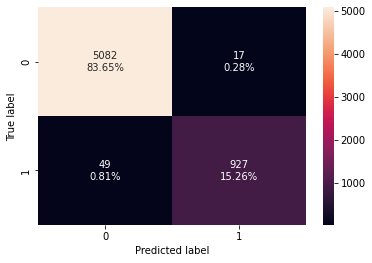

In [80]:
# Create confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

* Hyperparameter tuning improved gbc performance on the training data, but let's see if we can perform as well on the validation set

In [81]:
# Calculate model performance on validation set
val_score['Gradient Boost_Tuned'] = model_performance_classification_sklearn(gbc_tuned, X_val, y_val)

print('Validation Performance: ')
val_score['Gradient Boost_Tuned']

Validation Performance: 


Accuracy    Recall  Precision        F1
0  0.973346  0.892638    0.93871  0.915094

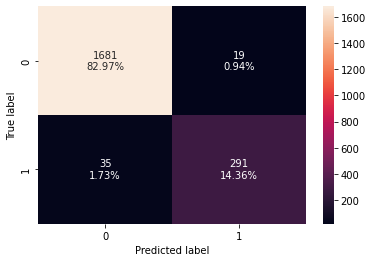

In [82]:
# Create confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

* Model generalized pretty well and scores well on recall

## XGBoost Oversampled

In [83]:
# Define our model
xgb_tuned = XGBClassifier(random_state=1, eval_metrics='logloss')

# Define grid of parameters to use for Randomized Search
parameters = {
    "n_estimators": [10,30,50,150,250],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Set our scoring metric
scorer = metrics.make_scorer(metrics.recall_score)

# Call RandomizedSearchCV
rand_obj = RandomizedSearchCV(estimator=xgb_tuned, param_distributions=parameters, n_jobs=-1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fit parameters in rand_obj
rand_obj.fit(X_train_over, y_train_over)

# Look and see what the best parameters of the randomized search is
print('Best parameters for XGBoost based off the randomized search are:')
print(pd.Series(rand_obj.best_params_))

Best parameters for XGBoost based off the randomized search are:
subsample             0.90
scale_pos_weight      5.00
n_estimators         50.00
learning_rate         0.05
colsample_bytree      0.90
colsample_bylevel     1.00
dtype: float64


In [84]:
# Build model with best parameters
xbg_tuned = XGBClassifier(
    random_state=1,
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=50,
    learning_rate= 0.05,
    colsample_bytree= 0.90,
    colsample_bylevel= 1
)

# Fit model on training data
xbg_tuned.fit(X_train_over, y_train_over)

XGBClassifier(colsample_bytree=0.9, learning_rate=0.05, n_estimators=50,
              random_state=1, scale_pos_weight=5, subsample=0.9)

In [85]:
# Calculating our models performance on the training set
print('XBC Training Performance:')
train_score['XGBoost_Tuned'] = model_performance_classification_sklearn(xbg_tuned, X_train_over, y_train_over)
train_score['XGBoost_Tuned']

XBC Training Performance:


Accuracy    Recall  Precision      F1
0  0.871838  0.997058   0.797365  0.8861

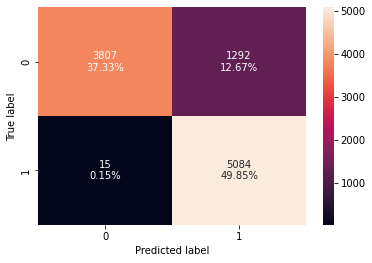

In [86]:
# Create confusion matrix
confusion_matrix_sklearn(xbg_tuned, X_train_over, y_train_over)

* Training recall improved but accuracy fell. Let's see how the model performs on the val set

In [87]:
# Calculate model performance on validation set
val_score['XGBoost_Tuned'] = model_performance_classification_sklearn(xbg_tuned, X_val, y_val)
print('Validation Performance:')
val_score['XGBoost_Tuned']

Validation Performance:


Accuracy    Recall  Precision       F1
0  0.792695  0.984663   0.436141  0.60452

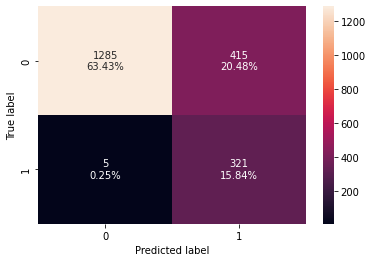

In [88]:
# Create confusion matrix
confusion_matrix_sklearn(xbg_tuned, X_val, y_val)

* Model performance on validation scored similar for recall but looking at the accuracy the model doesn't perform as well and fails to generalize 

## Logistic Regression Undersampled

In [89]:
# define our model
lr_tuned = LogisticRegression(random_state=1)

# define our grid of parameters
parameters = {
    'C': np.arange(0.1,1.1, 0.1),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs','newton-cg','liblinear', 'saga', 'sag'],
    'max_iter': [100, 200, 250, 500, 1000]
}

# Call on randomized cv 
rand_obj = RandomizedSearchCV(estimator = lr_tuned, param_distributions=parameters, n_jobs=-1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fit model on training data
rand_obj.fit(X_train_un, y_train_un)

# Look and see what the best parameters of the randomized search is
print('Best parameters for Logistic Regression based off the randomized search are:')
print(pd.Series(rand_obj.best_params_))

Best parameters for Logistic Regression based off the randomized search are:
solver      newton-cg
penalty          none
max_iter         1000
C                 0.5
dtype: object


In [92]:
# Build model with best parameters
lr_tuned = LogisticRegression(
    random_state=1, 
    solver='newton-cg',
    penalty='none',
    C=0.5,
    max_iter=1000
    )
# Fit model on undersampled training data
lr_tuned.fit(X_train_un ,y_train_un)

LogisticRegression(C=0.5, max_iter=1000, penalty='none', random_state=1,
                   solver='newton-cg')

In [93]:
# Check training performance
train_score['Logistic Regression_Tuned'] = model_performance_classification_sklearn(lr_tuned, X_train_un, y_train_un)
train_score['Logistic Regression_Tuned']

Accuracy    Recall  Precision        F1
0  0.841189  0.834016   0.846154  0.840041

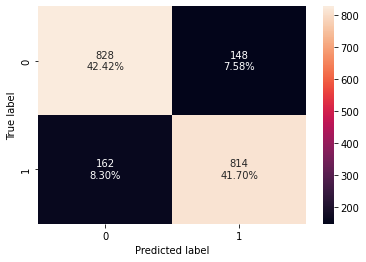

In [94]:
# Create confusion matrix
confusion_matrix_sklearn(lr_tuned, X_train_un, y_train_un)

* Training performance on the tuned model improved

In [95]:
# Calculate the validation performance
val_score['Logistic Regression_Tuned'] = model_performance_classification_sklearn(lr_tuned, X_val, y_val)

print('Validation Performance: ')
val_score['Logistic Regression_Tuned']

Validation Performance: 


Accuracy    Recall  Precision       F1
0  0.851925  0.837423      0.525  0.64539

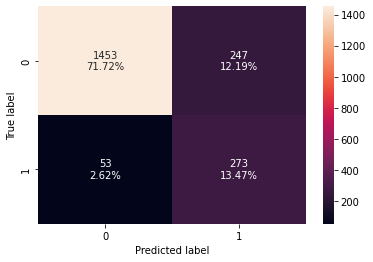

In [96]:
# Create confusion matrix
confusion_matrix_sklearn(lr_tuned, X_val, y_val)

We see improved performance on the val set too and we see good generilzation 

# Model Performance
Compare the model performance of tuned models and choose the best model

In [97]:
# Print model scores for comparision
cols = ['Gradient Boost_Tuned', 'XGBoost_Tuned', 'Logistic Regression_Tuned']

for col in cols: 
  print(f'{col} Training and Validatin Performance: ')
  print(train_score[col])
  print(val_score[col])
  print('--'*50)

Gradient Boost_Tuned Training and Validatin Performance: 
   Accuracy    Recall  Precision        F1
0  0.989136  0.949795   0.981992  0.965625
   Accuracy    Recall  Precision        F1
0  0.973346  0.892638    0.93871  0.915094
----------------------------------------------------------------------------------------------------
XGBoost_Tuned Training and Validatin Performance: 
   Accuracy    Recall  Precision      F1
0  0.871838  0.997058   0.797365  0.8861
   Accuracy    Recall  Precision       F1
0  0.792695  0.984663   0.436141  0.60452
----------------------------------------------------------------------------------------------------
Logistic Regression_Tuned Training and Validatin Performance: 
   Accuracy    Recall  Precision        F1
0  0.841189  0.834016   0.846154  0.840041
   Accuracy    Recall  Precision       F1
0  0.851925  0.837423      0.525  0.64539
----------------------------------------------------------------------------------------------------


Based off the performances above, I would select Gradient Boost Classfier. The model was able to generalize and be able to score well on the Recall. This model gives me the highest confidence in predicting which customer is likely to leave

In [98]:
# Check selected model performance on test set
model_performance_classification_sklearn(gbc_tuned, X_test, y_test)

Accuracy    Recall  Precision       F1
0  0.978282  0.916923   0.946032  0.93125

* Model performed really well on the test set. In addition, we're seeing a high F1 score even in the train and val set so we're able to maximize recall and precision 

## Feature Importance

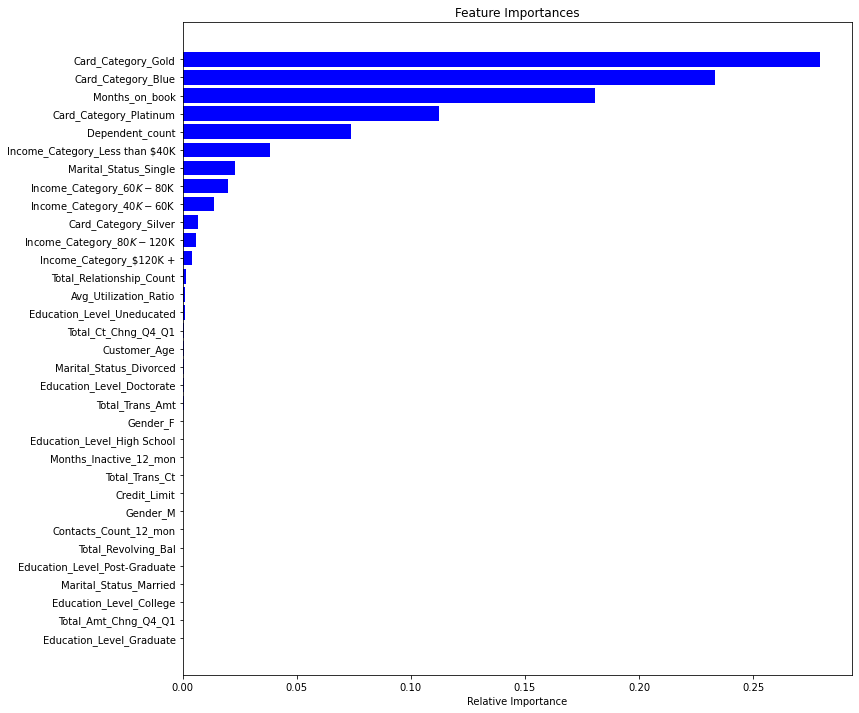

In [99]:
# Identify and plot feature importance 
feature_names = X.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Top features by importance:
1. Card Category 
2. Relationship period with bank
3. Number of dependent
4. Income level

## SHAP (Shapely Additive exPlanations)
Let's utilize SHAP to explore contributions of features and compare to sklearn method

In [100]:
# Initialize package 
shap.initjs()

In [101]:
# Calculate SHAP values
explainer = shap.TreeExplainer(gbc_tuned)
shap_values = explainer.shap_values(X)

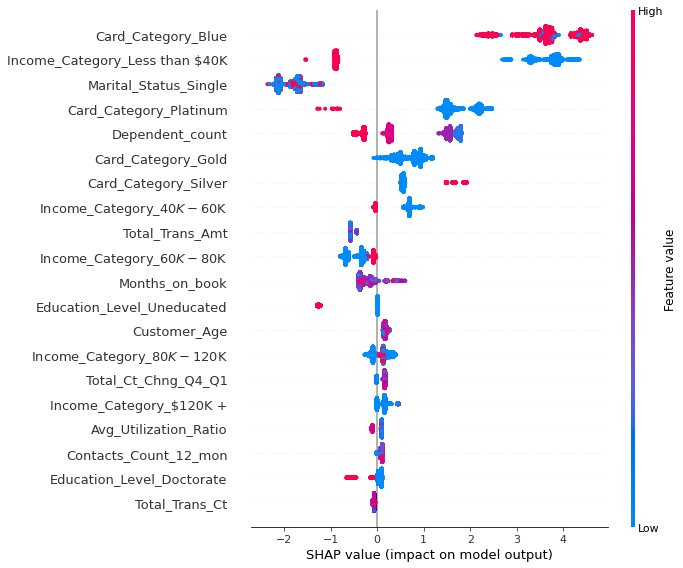

In [102]:
# Plot shap values
shap.summary_plot(shap_values, X)

Impacts of top features:
* Being a blue card member has a high positive impact to classification (more likely to attrite)
* Lower the income level, higher the positive impact on attrition likelihood
* Singles are less likely to attrite (high negative impact on classification)

# Productionize
Create final model using pipelines. I will create two different pipelines: one for numerical and one for categorical columns. 

For numerical, I will do missing value imputation and log transformation as pre-processing. I'll note here that I did run my previous models with and without log transformations and received similar results so I could leave that out.

For categorical, I will do one hot encoding and missing value imputation 

In [22]:
# Create list of numerical variables

numerical_features = [
                    'Customer_Age',
                    'Dependent_count',
                    'Months_on_book',
                    'Total_Relationship_Count',
                    'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon',
                    'Credit_Limit',
                    'Total_Revolving_Bal',
                    'Total_Amt_Chng_Q4_Q1',
                    'Total_Trans_Amt',
                    'Total_Trans_Ct',
                    'Total_Ct_Chng_Q4_Q1',
                    'Avg_Utilization_Ratio'
 ]

# Create list of categorical variables
categorical_features = [
                        'Gender',
                        'Education_Level',
                        'Marital_Status',
                        'Income_Category',
                        'Card_Category'
]

In [29]:
# Create class for log transformation to include in pipeline using sklearn's base package
class LogTransform(BaseEstimator, TransformerMixin):
   def fit(self,X, y=None):
     self.log = np.log(X+1)
     return self
   def transform(self, X, y=None):
     return np.log(X+1)
   def fit_transform(self, X, y=None):
     return np.log(X+1) 

In [30]:
# Create transformer for numerical variables to apply log transform and simple imputer
numeric_transformer = Pipeline(
    steps=[('transform', LogTransform()),
           ('imputer', SimpleImputer(strategy='median'))]
)

# Create transformer for categorical varialbes to apply one hot encoder and simple imputer
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Similar to our MLS, I included handle_unknown = 'ignore' to handle any unknown category in the test data

# Combine categorical and numerical transformers using column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)

In [31]:
# Split Data into target and independent variables
X = df1.drop('Attrition_Flag', axis=1)
y = df1['Attrition_Flag']

In [32]:
# Split data into train and test
# Note: Decided not to create a validation set since I do not need to compare models

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 18) (3039, 18)


In [33]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBC",
            GradientBoostingClassifier(
                random_state=1,
                subsample=0.9,
                n_estimators=250,
                min_samples_split=10,
                max_features=0.9
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   LogTransform()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
        

In [38]:
# use  model to predict on test set
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [37]:
# calculate model performance on train set
model_performance_classification_sklearn(model,X_train, y_train)

Accuracy    Recall  Precision        F1
0  0.989278  0.955224   0.977538  0.966252

* We get the same performance on the train set as above

In [39]:
# Calculate model performance on test set
model_performance_classification_sklearn(model, X_test, y_test)

Accuracy    Recall  Precision        F1
0  0.973676  0.897541   0.935897  0.916318

* We got similar performance scores with the pipeline as we did above! We now have a productionized model to use to predict who is likely to leave the bank

# Conclusion
Business recommendations and insights

Key Observations: 

* Majority of the customer base is female
* Majority are married or single
* Large majority make less than 40k dollars per year
* Overwhelming majority are Blue card members
* Customers tend to have credit limits on the lower end of the range
* Customers with 0-2 dependents tend to stay on as a customer 
* Customers with 2-3 products tend to attrite
* Customers who have to contact the bank multiple times throughout the year (3+) tend to leave
* Customers who have a high utilization rate tend to stay as customers

Recommendations for improvements: 
* Bring in more customers in the higher income range. Lower income has a higher tendency to leave so the bank should focus on providing benefits or services that attract higher income customers. 
* Promote other card categories to provide incentives for customers who use them (lower fees, points, etc). Looking at the data, an overwhelming majority of the customers are blue card members so there's a potential market for the other card categories. I've characterized the member base with the limited data so the bank could focus on creating campaigns to get that demographic in but also refine the characteristics as they obtain more data. The analysis done in this project also showed that being a blue member increased likelihood of attrition but we do have a drastic imbalance
* Track reason for contact. From the data, we can see that customers who have to contact the bank multiple times throughout the year tend to leave so it would be helpful to understand why they are contacting the bank and finding avenues to improve these concerns for the future
* Lack of use also lead to attrition so one recommendation would be to incentivize use such as bonus cash back for certain categories to increase card utilization 

# Appendix
Section to contain functions

In [63]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [64]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [65]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [36]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [67]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")